In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [3]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2023-12-31,1.166981
2024-03-31,0.97541
2024-06-30,-0.195958
2024-09-30,-0.067054


In [4]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104
2025-03-31,4.839644


In [6]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453
2024-12-31,6.786281


In [44]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="M",periods=len(kart)))
kart=kart.dropna()
kart=kart.resample("Q").mean()
kart=kart.pct_change().dropna()*100
kart

,Kart
2014-06-30,6.754972
2014-09-30,4.782597
2014-12-31,0.186316
2015-03-31,3.013984
2015-06-30,10.511476
2015-09-30,2.186056
2015-12-31,-0.932084
2016-03-31,0.701274
2016-06-30,7.737326
2016-09-30,1.395230


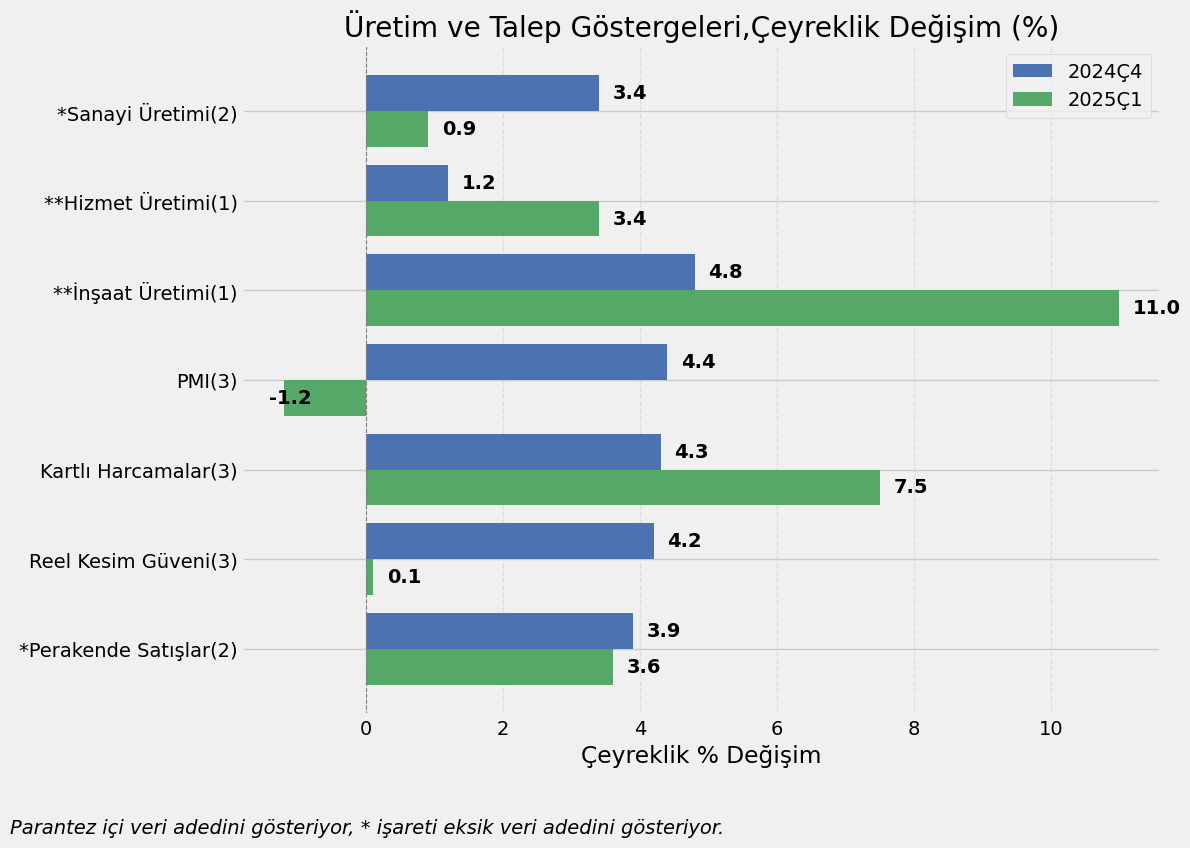

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Veri tanımı
gösterge = pd.DataFrame(columns=["2024Ç4", "2025Ç1"])
gösterge.loc["*Sanayi Üretimi(2)"] = [3.4, 0.9]
gösterge.loc["**Hizmet Üretimi(1)"] = [1.2, 3.4]
gösterge.loc["**İnşaat Üretimi(1)"] = [4.8, 11.0]
gösterge.loc["PMI(3)"] = [4.4, -1.2]
gösterge.loc["Kartlı Harcamalar(3)"] = [4.3, 7.5]
gösterge.loc["Reel Kesim Güveni(3)"] = [4.2, 0.1]
gösterge.loc["*Perakende Satışlar(2)"] = [3.9, 3.6]

# 2024 üstte olacak şekilde sıralama
gösterge = gösterge[["2024Ç4", "2025Ç1"]]

y = np.arange(len(gösterge))
bar_width = 0.4

# Grafik oluştur
fig, ax = plt.subplots(figsize=(12, 8))
bars1 = ax.barh(y - bar_width/2, gösterge["2024Ç4"], height=bar_width, label='2024Ç4', color='#4C72B0')
bars2 = ax.barh(y + bar_width/2, gösterge["2025Ç1"], height=bar_width, label='2025Ç1', color='#55A868')

# Değerleri kalın olarak ekle
for bars in [bars1, bars2]:
    for bar in bars:
        width = bar.get_width()
        ha = 'left' if width >= 0 else 'right'
        offset = 0.2 if width >= 0 else 0.4  # negatiflerde daha büyük boşluk
        ax.text(width + offset, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}', va='center', ha=ha, fontweight='bold')

fig.text(0.01, -0.05, "Parantez içi veri adedini gösteriyor, * işareti eksik veri adedini gösteriyor.", 
         ha='left', va='center', fontsize=14, style='italic')

# Eksen ayarları
ax.set_yticks(y)
ax.set_yticklabels(gösterge.index)
ax.invert_yaxis()  # Bu satır önemli!
ax.set_xlabel('Çeyreklik % Değişim')
ax.set_title('Üretim ve Talep Göstergeleri,Çeyreklik Değişim (%)')
ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')
ax.legend()
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()


In [8]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.989102
1999-09-30,-0.087589
1999-12-31,2.518921
2000-03-31,3.537326
2000-06-30,-0.159674
...,...
2024-03-31,0.892466
2024-06-30,0.629975
2024-09-30,0.917891
2024-12-31,2.184441


In [9]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [10]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [11]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2024-06-30,64.998462
2024-09-30,60.784615
2024-12-31,59.899231
2025-03-31,58.065385


In [12]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2024-06-30,55.676923
2024-09-30,54.312308
2024-12-31,54.683077
2025-03-31,50.635385


In [13]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2024-06-30,63.980000
2024-09-30,59.349231
2024-12-31,59.299231
2025-03-31,52.840769


In [14]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2024-03-31,3.072172
2024-06-30,-3.893249
2024-09-30,-1.047028
2024-12-31,3.392068


In [15]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.933976
2024-12-31,5.786708


In [16]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2024-03-31,8.359733
2024-06-30,7.890625
2024-09-30,10.977930
2024-12-31,7.814873


In [17]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692
2024-12-31,7.690816


In [18]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864
2024-12-31,3.362095


In [19]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2024-03-31,-1.343570
2024-06-30,-0.648508
2024-09-30,-3.426893
2024-12-31,4.190605


In [20]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [21]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))

kko=kko.dropna()
kko

,KKO
2007-03-31,81.433333
2007-06-30,82.966667
2007-09-30,81.833333
2007-12-31,81.500000
2008-03-31,80.766667
...,...
2024-03-31,76.866667
2024-06-30,76.600000
2024-09-30,75.833333
2024-12-31,75.466667


In [22]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2005-03-31,9.200000
2005-06-30,9.400000
2005-09-30,9.100000
2005-12-31,9.300000
2006-03-31,9.133333
...,...
2024-03-31,8.800000
2024-06-30,8.766667
2024-09-30,8.733333
2024-12-31,8.566667


In [23]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2024-03-31,-0.583090
2024-06-30,0.209468
2024-09-30,-5.852843
2024-12-31,3.863233


In [24]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [25]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,-1.441678
2016-06-30,-3.125000
2016-09-30,-1.921757
2016-12-31,2.379286
2017-03-31,3.007519
2017-06-30,6.104844
2017-09-30,1.563477
2017-12-31,-1.108374
2018-03-31,1.556663
2018-06-30,-12.875536


In [26]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2025-03-31"]
data.iloc[-1:]=data.iloc[-1:].fillna(method="ffill")
#data["İşsizlik"].iloc[-1]=8.
data=data.astype(float)
data=data.fillna(method="ffill")
data=data.dropna()
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,77.533333,12.387354,10.366667,7.905282,3.679217,2.954271,2.858421,9.655385,...,2.190534,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,-2.302100,3.351780,-3.125000
2016-09-30,-2.867673,-11.986557,76.966667,-11.706412,11.266667,1.055159,2.393532,3.287543,3.173361,9.039286,...,0.789547,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-0.165358,-2.406508,-1.921757
2016-12-31,5.509612,18.585843,77.666667,10.443895,11.733333,0.564865,7.431690,5.087110,4.898119,8.851538,...,1.835892,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,1.035197,4.458596,2.379286
2017-03-31,1.368865,-2.150997,77.666667,-1.533311,11.933333,1.778078,5.128144,4.833735,4.709149,8.805385,...,1.338169,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-7.909836,1.810678,3.007519
2017-06-30,2.280319,4.684057,78.766667,13.467062,11.233333,9.027657,5.390604,4.335505,4.227601,10.147692,...,1.104119,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,9.924344,-1.090281,6.104844
2017-09-30,1.515919,-4.403850,78.366667,5.743089,10.466667,6.161197,3.331476,3.046696,3.148272,10.856923,...,2.476805,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,2.591093,4.770362,1.563477
2017-12-31,1.882761,12.045111,79.300000,6.168259,10.100000,1.363470,6.523372,4.880301,5.005775,11.167692,...,0.929072,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,1.302289,0.468261,-1.108374
2018-03-31,1.267288,-2.255476,78.866667,-2.529621,9.933333,0.835828,3.350712,1.892066,2.053103,11.386923,...,0.768405,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,0.857032,0.418925,1.556663
2018-06-30,0.588499,0.252231,78.000000,-0.590437,10.500000,10.634017,8.472543,8.311555,8.300886,12.697692,...,-0.235312,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-5.639243,0.220832,-12.875536
2018-09-30,-0.961150,-0.943565,76.766667,-16.392345,11.166667,7.885191,10.581760,11.410152,10.947282,17.533077,...,-0.956821,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-10.929185,0.342068,-2.814919


In [40]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.430032,0.500961,1.075571,-0.430014,-0.246470,-0.584545,-0.929630,-1.001074,-0.758578,-0.779484,...,-0.100428,-0.061678,-0.951496,0.260172,-0.811452,-1.019141,-0.233316,0.750577,-0.480111,0.062258
1,-1.360261,0.279917,-1.438098,0.107227,-0.862070,-0.814735,-0.866112,-0.940459,-0.802208,-0.819531,...,-0.047033,-0.526410,-0.910382,0.339615,-0.904204,-0.576252,-0.076503,-0.950683,-0.300076,-1.137198
2,1.601325,0.552971,0.872813,0.385797,-0.906131,0.087299,-0.523135,-0.608503,-0.815503,-0.831975,...,0.083746,0.459192,-0.769521,-0.400223,-0.610009,0.344484,0.011604,1.077580,0.343466,1.200373
3,-0.407478,0.552971,-0.376752,0.505184,-0.797103,-0.325129,-0.571425,-0.644873,-0.818772,-0.810453,...,-0.172656,0.064486,-0.379667,-0.504054,-0.029507,0.550363,-0.644862,0.295265,0.437465,0.044952
4,0.254642,0.982057,1.188215,0.087329,-0.145605,-0.278138,-0.666382,-0.737554,-0.723715,-0.711312,...,0.222805,0.362046,-0.751485,0.942321,-0.761156,-1.164866,0.663969,-0.561810,0.900901,0.299281
5,-0.625715,0.826026,0.382384,-0.370321,-0.403205,-0.646805,-0.912014,-0.945288,-0.673490,-0.685651,...,0.315732,0.167091,-1.055699,0.008679,-0.844623,-1.025769,0.125790,1.169690,0.221401,0.085985
6,0.967716,1.190098,0.426742,-0.589197,-0.834363,-0.075327,-0.562550,-0.587783,-0.651482,-0.666319,...,0.045416,0.376195,-0.500798,-0.931729,-0.537090,0.043859,0.031206,-0.101346,-0.178374,0.188348
7,-0.417599,1.021064,-0.480696,-0.688686,-0.881780,-0.643361,-1.132074,-1.156069,-0.635957,-0.643969,...,-0.031664,-0.255213,-0.693810,0.942034,-0.416877,-0.784903,-0.001471,-0.115922,0.220381,0.016608
8,-0.174675,0.682997,-0.278384,-0.350423,-0.001247,0.273653,0.091408,0.046411,-0.543134,-0.570052,...,-0.586040,-0.327488,-0.355158,-0.253802,0.009831,0.766081,-0.478226,-0.174447,-1.939031,-0.172799
9,-0.290513,0.201901,-1.926974,0.047534,-0.248275,0.651289,0.681965,0.555749,-0.200711,-0.243464,...,-1.094360,-0.391512,-0.049952,-0.736737,0.706755,2.217460,-0.866449,-0.138629,-0.433715,-0.605208


In [41]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [74]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
predictions=[]
features_set=[]

def objective(trial):
    selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]

    """for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)"""

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
    y_train,y_test=y[:-11],y[-11:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])
    predictions.append(scaler.inverse_transform(y_pred)[-1])
    features_set.append(selected_features)

    return mse  # Return validation accuracy as the objective

In [75]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:06:15,967] Trial 252 finished with value: 1.151554453970519 and parameters: {'learning_rate': 0.037188915051424964, 'units1': 174, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.317610196267488}. Best is trial 84 with value: 0.45416611652706.


[1.2910963]
1/1 [==============================] - 0s 68ms/step


[I 2025-04-11 00:06:17,707] Trial 253 finished with value: 1.3243293734162025 and parameters: {'learning_rate': 0.040149671822615, 'units1': 164, 'batch_size': 70, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.402823350042218}. Best is trial 84 with value: 0.45416611652706.


[0.08787017]
1/1 [==============================] - 0s 79ms/step


[I 2025-04-11 00:06:19,894] Trial 254 finished with value: 1.5921550221020864 and parameters: {'learning_rate': 0.03180264481562524, 'units1': 181, 'batch_size': 69, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.42722396916579536}. Best is trial 84 with value: 0.45416611652706.


[1.6795073]
1/1 [==============================] - 0s 102ms/step


[I 2025-04-11 00:06:22,157] Trial 255 finished with value: 0.5853373285435286 and parameters: {'learning_rate': 0.036535919774804027, 'units1': 159, 'batch_size': 67, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3199843025915988}. Best is trial 84 with value: 0.45416611652706.


[0.39554688]
1/1 [==============================] - 0s 142ms/step


[I 2025-04-11 00:06:24,788] Trial 256 finished with value: 0.7761674617295766 and parameters: {'learning_rate': 0.03355950649890043, 'units1': 169, 'batch_size': 63, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2892705189400735}. Best is trial 84 with value: 0.45416611652706.


[0.54945076]
1/1 [==============================] - 0s 112ms/step


[I 2025-04-11 00:06:27,428] Trial 257 finished with value: 1.3882314737373205 and parameters: {'learning_rate': 0.038567545437576095, 'units1': 194, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3340709771630975}. Best is trial 84 with value: 0.45416611652706.


[1.6447059]
1/1 [==============================] - 0s 81ms/step


[I 2025-04-11 00:06:29,842] Trial 258 finished with value: 0.6948944335165134 and parameters: {'learning_rate': 0.04328519061658777, 'units1': 162, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36449059849553245}. Best is trial 84 with value: 0.45416611652706.


[0.3149313]
1/1 [==============================] - 0s 119ms/step


[I 2025-04-11 00:06:32,377] Trial 259 finished with value: 1.0447949058072556 and parameters: {'learning_rate': 0.04090034373877502, 'units1': 160, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3366465829373468}. Best is trial 84 with value: 0.45416611652706.


[0.41490647]
1/1 [==============================] - 0s 87ms/step


[I 2025-04-11 00:06:34,558] Trial 260 finished with value: 1.7271728177688679 and parameters: {'learning_rate': 0.036061135068026696, 'units1': 167, 'batch_size': 75, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.3832370044948571}. Best is trial 84 with value: 0.45416611652706.


[-0.08245511]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:06:36,734] Trial 261 finished with value: 1.8254807262034167 and parameters: {'learning_rate': 0.03127777288647695, 'units1': 175, 'batch_size': 60, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.35060967613248767}. Best is trial 84 with value: 0.45416611652706.


[1.3488408]
1/1 [==============================] - 0s 69ms/step


[I 2025-04-11 00:06:38,341] Trial 262 finished with value: 0.7118862000412309 and parameters: {'learning_rate': 0.03877559167697908, 'units1': 159, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.46444461179636043}. Best is trial 84 with value: 0.45416611652706.


[0.5156237]
1/1 [==============================] - 0s 69ms/step


[I 2025-04-11 00:06:39,910] Trial 263 finished with value: 2.1173096676924166 and parameters: {'learning_rate': 0.03370769608704124, 'units1': 240, 'batch_size': 56, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.3108954059249352}. Best is trial 84 with value: 0.45416611652706.


[-0.18810423]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:06:41,503] Trial 264 finished with value: 1.3564863235357367 and parameters: {'learning_rate': 0.03561578515414707, 'units1': 152, 'batch_size': 73, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3965612299137648}. Best is trial 84 with value: 0.45416611652706.


[0.7718274]
1/1 [==============================] - 0s 88ms/step


[I 2025-04-11 00:06:43,176] Trial 265 finished with value: 0.7890124480285087 and parameters: {'learning_rate': 0.03755285338779444, 'units1': 164, 'batch_size': 67, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4500872142713544}. Best is trial 84 with value: 0.45416611652706.


[0.20056038]
1/1 [==============================] - 0s 103ms/step


[I 2025-04-11 00:06:45,455] Trial 266 finished with value: 1.3139134191038642 and parameters: {'learning_rate': 0.029086460698705286, 'units1': 169, 'batch_size': 61, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37197991076927495}. Best is trial 84 with value: 0.45416611652706.


[1.1858337]
1/1 [==============================] - 0s 89ms/step


[I 2025-04-11 00:06:47,543] Trial 267 finished with value: 0.6809413651966676 and parameters: {'learning_rate': 0.0327593251504728, 'units1': 150, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4224289503612316}. Best is trial 84 with value: 0.45416611652706.


[0.8477655]
1/1 [==============================] - 0s 80ms/step


[I 2025-04-11 00:06:49,525] Trial 268 finished with value: 0.7327146057721133 and parameters: {'learning_rate': 0.031525620994686226, 'units1': 150, 'batch_size': 58, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4269651410859089}. Best is trial 84 with value: 0.45416611652706.


[0.88097936]
1/1 [==============================] - 0s 102ms/step


[I 2025-04-11 00:06:51,815] Trial 269 finished with value: 0.8416984558505256 and parameters: {'learning_rate': 0.032978351715248176, 'units1': 157, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.28478452941691174}. Best is trial 84 with value: 0.45416611652706.


[0.34309438]
1/1 [==============================] - 0s 101ms/step


[I 2025-04-11 00:06:54,872] Trial 270 finished with value: 0.9838956686315926 and parameters: {'learning_rate': 0.03416996989529661, 'units1': 151, 'batch_size': 62, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.38710707138604755}. Best is trial 84 with value: 0.45416611652706.


[0.5443089]
1/1 [==============================] - 0s 117ms/step


[I 2025-04-11 00:06:57,203] Trial 271 finished with value: 0.6747846117937129 and parameters: {'learning_rate': 0.04177779966461921, 'units1': 139, 'batch_size': 54, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4218056115134009}. Best is trial 84 with value: 0.45416611652706.


[0.14167766]
1/1 [==============================] - 0s 103ms/step


[I 2025-04-11 00:06:59,226] Trial 272 finished with value: 1.06343941828955 and parameters: {'learning_rate': 0.041636451788470585, 'units1': 136, 'batch_size': 53, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3471139329248184}. Best is trial 84 with value: 0.45416611652706.


[0.35219213]
1/1 [==============================] - 0s 78ms/step


[I 2025-04-11 00:07:01,917] Trial 273 finished with value: 0.6272067757314758 and parameters: {'learning_rate': 0.04317862437739896, 'units1': 139, 'batch_size': 56, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3706723988421936}. Best is trial 84 with value: 0.45416611652706.


[0.09267347]
1/1 [==============================] - 0s 113ms/step


[I 2025-04-11 00:07:04,307] Trial 274 finished with value: 1.0625486052489714 and parameters: {'learning_rate': 0.044272705358957914, 'units1': 140, 'batch_size': 54, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36577857805078745}. Best is trial 84 with value: 0.45416611652706.


[0.6178659]
1/1 [==============================] - 0s 116ms/step


[I 2025-04-11 00:07:07,939] Trial 275 finished with value: 1.4055068771478654 and parameters: {'learning_rate': 0.04174262113710769, 'units1': 143, 'batch_size': 57, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5037598174397842}. Best is trial 84 with value: 0.45416611652706.


[1.1269472]
1/1 [==============================] - 0s 97ms/step


[I 2025-04-11 00:07:10,326] Trial 276 finished with value: 0.8261201488346922 and parameters: {'learning_rate': 0.0444441163590721, 'units1': 133, 'batch_size': 56, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.32312483577996115}. Best is trial 84 with value: 0.45416611652706.


[0.41028073]
1/1 [==============================] - 0s 119ms/step


[I 2025-04-11 00:07:12,827] Trial 277 finished with value: 0.8994734373329691 and parameters: {'learning_rate': 0.04032069178258868, 'units1': 158, 'batch_size': 59, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.39076953610953313}. Best is trial 84 with value: 0.45416611652706.


[0.0082057]
1/1 [==============================] - 0s 89ms/step


[I 2025-04-11 00:07:14,893] Trial 278 finished with value: 1.1373926843008932 and parameters: {'learning_rate': 0.0391080223614851, 'units1': 147, 'batch_size': 55, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.4532259674583158}. Best is trial 84 with value: 0.45416611652706.


[0.39868143]
1/1 [==============================] - 0s 135ms/step


[I 2025-04-11 00:07:17,008] Trial 279 finished with value: 0.9161699088393732 and parameters: {'learning_rate': 0.04276391321573256, 'units1': 211, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.41753931838601427}. Best is trial 84 with value: 0.45416611652706.


[-0.03710349]
1/1 [==============================] - 0s 82ms/step


[I 2025-04-11 00:07:24,931] Trial 280 finished with value: 0.8671265117363859 and parameters: {'learning_rate': 0.04032621963432606, 'units1': 154, 'batch_size': 60, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3018698737252568}. Best is trial 84 with value: 0.45416611652706.


[0.33031145]
1/1 [==============================] - 0s 90ms/step


[I 2025-04-11 00:07:26,999] Trial 281 finished with value: 0.6886702740305364 and parameters: {'learning_rate': 0.03852998095679896, 'units1': 140, 'batch_size': 78, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3385334779168345}. Best is trial 84 with value: 0.45416611652706.


[0.6239978]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:07:29,103] Trial 282 finished with value: 0.8030791913771103 and parameters: {'learning_rate': 0.03584563963959626, 'units1': 163, 'batch_size': 50, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37358630434590456}. Best is trial 84 with value: 0.45416611652706.


[0.09496717]
1/1 [==============================] - 0s 89ms/step


[I 2025-04-11 00:07:31,314] Trial 283 finished with value: 0.9002619447204457 and parameters: {'learning_rate': 0.037411886177278905, 'units1': 158, 'batch_size': 72, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3546892489990449}. Best is trial 84 with value: 0.45416611652706.


[0.01687805]
1/1 [==============================] - 0s 91ms/step


[I 2025-04-11 00:07:33,481] Trial 284 finished with value: 0.8589329030599477 and parameters: {'learning_rate': 0.03477638359332114, 'units1': 145, 'batch_size': 58, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4420959792094858}. Best is trial 84 with value: 0.45416611652706.


[0.2930626]
1/1 [==============================] - 0s 90ms/step


[I 2025-04-11 00:07:35,489] Trial 285 finished with value: 1.0668541862091208 and parameters: {'learning_rate': 0.0461591317620467, 'units1': 165, 'batch_size': 66, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.41242250529051255}. Best is trial 84 with value: 0.45416611652706.


[0.39240542]
1/1 [==============================] - 0s 116ms/step


[I 2025-04-11 00:07:37,733] Trial 286 finished with value: 1.5574255427065034 and parameters: {'learning_rate': 0.042034010606262405, 'units1': 129, 'batch_size': 14, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3921922710383045}. Best is trial 84 with value: 0.45416611652706.


[1.5386766]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:07:39,341] Trial 287 finished with value: 1.0506800004065278 and parameters: {'learning_rate': 0.03934510011466337, 'units1': 153, 'batch_size': 52, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.47046190717678155}. Best is trial 84 with value: 0.45416611652706.


[0.19378822]
1/1 [==============================] - 0s 68ms/step


[I 2025-04-11 00:07:41,283] Trial 288 finished with value: 1.5935047544492211 and parameters: {'learning_rate': 0.03058041817669515, 'units1': 122, 'batch_size': 61, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9989409340077849}. Best is trial 84 with value: 0.45416611652706.


[1.3255761]
1/1 [==============================] - 0s 75ms/step


[I 2025-04-11 00:07:42,882] Trial 289 finished with value: 0.6034765824114857 and parameters: {'learning_rate': 0.0371951146972757, 'units1': 160, 'batch_size': 55, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37700023256975296}. Best is trial 84 with value: 0.45416611652706.


[0.16078453]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:07:44,636] Trial 290 finished with value: 3.4446549947078204 and parameters: {'learning_rate': 0.03649110037366694, 'units1': 159, 'batch_size': 69, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.3710254235333418}. Best is trial 84 with value: 0.45416611652706.


[0.6115374]
1/1 [==============================] - 0s 92ms/step


[I 2025-04-11 00:07:46,614] Trial 291 finished with value: 0.726751586723792 and parameters: {'learning_rate': 0.034753099108433355, 'units1': 164, 'batch_size': 43, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3336185284609525}. Best is trial 84 with value: 0.45416611652706.


[0.34960124]
1/1 [==============================] - 0s 83ms/step


[I 2025-04-11 00:07:48,700] Trial 292 finished with value: 0.6509369295007562 and parameters: {'learning_rate': 0.036963341752657454, 'units1': 159, 'batch_size': 63, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3586159513450004}. Best is trial 84 with value: 0.45416611652706.


[0.3682985]
1/1 [==============================] - 0s 93ms/step


[I 2025-04-11 00:07:51,113] Trial 293 finished with value: 1.2740444152567563 and parameters: {'learning_rate': 0.0388256334088235, 'units1': 161, 'batch_size': 57, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3541966022997235}. Best is trial 84 with value: 0.45416611652706.


[-0.05743046]
1/1 [==============================] - 0s 79ms/step


[I 2025-04-11 00:07:53,127] Trial 294 finished with value: 0.7320222025459736 and parameters: {'learning_rate': 0.03744634371316381, 'units1': 156, 'batch_size': 48, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3506673503725699}. Best is trial 84 with value: 0.45416611652706.


[0.26524547]
1/1 [==============================] - 0s 91ms/step


[I 2025-04-11 00:07:55,233] Trial 295 finished with value: 1.099733346185976 and parameters: {'learning_rate': 0.040137446187437524, 'units1': 167, 'batch_size': 63, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.39907480007332574}. Best is trial 84 with value: 0.45416611652706.


[0.03367571]
1/1 [==============================] - 0s 69ms/step


[I 2025-04-11 00:07:57,237] Trial 296 finished with value: 0.6659883242737077 and parameters: {'learning_rate': 0.032602416613655406, 'units1': 160, 'batch_size': 59, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37470857768174237}. Best is trial 84 with value: 0.45416611652706.


[0.20989983]
1/1 [==============================] - 0s 84ms/step


[I 2025-04-11 00:07:59,399] Trial 297 finished with value: 1.3120250444324655 and parameters: {'learning_rate': 0.027857331829141997, 'units1': 172, 'batch_size': 61, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37711435060790116}. Best is trial 84 with value: 0.45416611652706.


[1.447442]
1/1 [==============================] - 0s 133ms/step


[I 2025-04-11 00:08:01,564] Trial 298 finished with value: 1.6628159420293298 and parameters: {'learning_rate': 0.03240868708583738, 'units1': 161, 'batch_size': 29, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3307383828503458}. Best is trial 84 with value: 0.45416611652706.


[1.645191]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:08:03,523] Trial 299 finished with value: 1.2013268549789446 and parameters: {'learning_rate': 0.029703309411020024, 'units1': 178, 'batch_size': 59, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3696846169526211}. Best is trial 84 with value: 0.45416611652706.


[1.0564666]
1/1 [==============================] - 0s 83ms/step


[I 2025-04-11 00:08:05,284] Trial 300 finished with value: 0.8640835761540228 and parameters: {'learning_rate': 0.03379481331059786, 'units1': 166, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.29484109312978635}. Best is trial 84 with value: 0.45416611652706.


[0.29556528]
1/1 [==============================] - 0s 80ms/step


[I 2025-04-11 00:08:07,846] Trial 301 finished with value: 1.3881790193407346 and parameters: {'learning_rate': 0.03753083137892345, 'units1': 161, 'batch_size': 67, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.24775177966947431}. Best is trial 84 with value: 0.45416611652706.


[1.4094958]
1/1 [==============================] - 0s 96ms/step


[I 2025-04-11 00:08:10,134] Trial 302 finished with value: 1.7942898161783982 and parameters: {'learning_rate': 0.03145750749701496, 'units1': 152, 'batch_size': 73, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3817012520874626}. Best is trial 84 with value: 0.45416611652706.


[0.5342989]
1/1 [==============================] - 0s 102ms/step


[I 2025-04-11 00:08:12,872] Trial 303 finished with value: 0.9611294682566527 and parameters: {'learning_rate': 0.035900623845926044, 'units1': 158, 'batch_size': 62, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3997916171759383}. Best is trial 84 with value: 0.45416611652706.


[0.04229383]
1/1 [==============================] - 0s 89ms/step


[I 2025-04-11 00:08:15,256] Trial 304 finished with value: 1.3346437553624273 and parameters: {'learning_rate': 0.0238278935690462, 'units1': 168, 'batch_size': 58, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3249788098832968}. Best is trial 84 with value: 0.45416611652706.


[1.3902919]
1/1 [==============================] - 0s 83ms/step


[I 2025-04-11 00:08:17,842] Trial 305 finished with value: 0.7625552230398553 and parameters: {'learning_rate': 0.03337503015025148, 'units1': 164, 'batch_size': 69, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34845228320036314}. Best is trial 84 with value: 0.45416611652706.


[0.3650917]
1/1 [==============================] - 0s 87ms/step


[I 2025-04-11 00:08:19,938] Trial 306 finished with value: 0.9257275281801632 and parameters: {'learning_rate': 0.038999358250491924, 'units1': 155, 'batch_size': 56, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37181664016580873}. Best is trial 84 with value: 0.45416611652706.


[-0.0842367]
1/1 [==============================] - 0s 75ms/step


[I 2025-04-11 00:08:21,585] Trial 307 finished with value: 2.7641169401914594 and parameters: {'learning_rate': 0.043956339575464354, 'units1': 174, 'batch_size': 71, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.39372080048868907}. Best is trial 84 with value: 0.45416611652706.


[-0.19168814]
1/1 [==============================] - 0s 91ms/step


[I 2025-04-11 00:08:23,126] Trial 308 finished with value: 0.6532007875295464 and parameters: {'learning_rate': 0.036939078472929814, 'units1': 159, 'batch_size': 60, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5610046699757738}. Best is trial 84 with value: 0.45416611652706.


[0.7938353]
1/1 [==============================] - 0s 74ms/step


[I 2025-04-11 00:08:24,673] Trial 309 finished with value: 0.5752851716459594 and parameters: {'learning_rate': 0.037562099237741266, 'units1': 162, 'batch_size': 61, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36166784796379925}. Best is trial 84 with value: 0.45416611652706.


[0.40583405]
1/1 [==============================] - 0s 108ms/step


[I 2025-04-11 00:08:26,420] Trial 310 finished with value: 0.920964214562338 and parameters: {'learning_rate': 0.04008729395785533, 'units1': 169, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.357708522519219}. Best is trial 84 with value: 0.45416611652706.


[0.22466873]
1/1 [==============================] - 0s 67ms/step


[I 2025-04-11 00:08:28,963] Trial 311 finished with value: 1.0261447777878263 and parameters: {'learning_rate': 0.03770798610731366, 'units1': 88, 'batch_size': 62, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.27342255638968355}. Best is trial 84 with value: 0.45416611652706.


[0.98736966]
1/1 [==============================] - 0s 110ms/step


[I 2025-04-11 00:08:31,640] Trial 312 finished with value: 0.7936158751980791 and parameters: {'learning_rate': 0.037201621569097246, 'units1': 163, 'batch_size': 66, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3138887789914918}. Best is trial 84 with value: 0.45416611652706.


[0.17262475]
1/1 [==============================] - 0s 89ms/step


[I 2025-04-11 00:08:34,004] Trial 313 finished with value: 0.7307638749972593 and parameters: {'learning_rate': 0.040962459170996064, 'units1': 149, 'batch_size': 46, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3435591956998327}. Best is trial 84 with value: 0.45416611652706.


[0.14911]
1/1 [==============================] - 0s 84ms/step


[I 2025-04-11 00:08:36,182] Trial 314 finished with value: 0.9447048206937598 and parameters: {'learning_rate': 0.043249640222230205, 'units1': 158, 'batch_size': 63, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4394197112502912}. Best is trial 84 with value: 0.45416611652706.


[-0.04470821]
1/1 [==============================] - 0s 125ms/step


[I 2025-04-11 00:08:38,410] Trial 315 finished with value: 1.5689586301572458 and parameters: {'learning_rate': 0.035981987932699584, 'units1': 166, 'batch_size': 60, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.4054389476097073}. Best is trial 84 with value: 0.45416611652706.


[1.4505372]
1/1 [==============================] - 0s 68ms/step


[I 2025-04-11 00:08:40,611] Trial 316 finished with value: 0.887547432663189 and parameters: {'learning_rate': 0.03925518573120361, 'units1': 154, 'batch_size': 56, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.33414255898399803}. Best is trial 84 with value: 0.45416611652706.


[0.33297643]
1/1 [==============================] - 0s 83ms/step


[I 2025-04-11 00:08:42,461] Trial 317 finished with value: 0.8551991261637062 and parameters: {'learning_rate': 0.047783964911235155, 'units1': 170, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3857860183116478}. Best is trial 84 with value: 0.45416611652706.


[-0.07624848]
1/1 [==============================] - 0s 104ms/step


[I 2025-04-11 00:08:44,279] Trial 318 finished with value: 1.2891095280092197 and parameters: {'learning_rate': 0.03823809051443521, 'units1': 161, 'batch_size': 51, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3606807917591307}. Best is trial 84 with value: 0.45416611652706.


[-0.03820368]
1/1 [==============================] - 0s 68ms/step


[I 2025-04-11 00:08:46,269] Trial 319 finished with value: 0.8740561989313151 and parameters: {'learning_rate': 0.0346939043280957, 'units1': 146, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.41899129855192707}. Best is trial 84 with value: 0.45416611652706.


[0.45784524]
1/1 [==============================] - 0s 66ms/step


[I 2025-04-11 00:08:47,902] Trial 320 finished with value: 2.3077445430769146 and parameters: {'learning_rate': 0.04108720439408553, 'units1': 175, 'batch_size': 59, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.6319121937441792}. Best is trial 84 with value: 0.45416611652706.


[0.27251616]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:08:49,657] Trial 321 finished with value: 1.0677322566345164 and parameters: {'learning_rate': 0.03626422542849714, 'units1': 152, 'batch_size': 71, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5490126153347151}. Best is trial 84 with value: 0.45416611652706.


[0.8100411]
1/1 [==============================] - 0s 111ms/step


[I 2025-04-11 00:08:51,809] Trial 322 finished with value: 0.6077625464686471 and parameters: {'learning_rate': 0.038364056697539346, 'units1': 165, 'batch_size': 55, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.38982834228836855}. Best is trial 84 with value: 0.45416611652706.


[0.56846946]
1/1 [==============================] - 0s 138ms/step


[I 2025-04-11 00:08:54,097] Trial 323 finished with value: 0.7353790704558488 and parameters: {'learning_rate': 0.03925228019528246, 'units1': 170, 'batch_size': 53, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.40894959507584094}. Best is trial 84 with value: 0.45416611652706.


[0.15478782]
1/1 [==============================] - 0s 112ms/step


[I 2025-04-11 00:09:00,709] Trial 324 finished with value: 0.7491560985770844 and parameters: {'learning_rate': 0.045852108634558235, 'units1': 177, 'batch_size': 81, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.38857816524407074}. Best is trial 84 with value: 0.45416611652706.


[0.28230676]
1/1 [==============================] - 0s 111ms/step


[I 2025-04-11 00:09:03,351] Trial 325 finished with value: 0.5465812009963478 and parameters: {'learning_rate': 0.04156235437218304, 'units1': 165, 'batch_size': 76, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4339945778024655}. Best is trial 84 with value: 0.45416611652706.


[0.49380764]
1/1 [==============================] - 0s 123ms/step


[I 2025-04-11 00:09:05,931] Trial 326 finished with value: 1.245172258923676 and parameters: {'learning_rate': 0.04271554412050093, 'units1': 183, 'batch_size': 73, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.48786766733870857}. Best is trial 84 with value: 0.45416611652706.


[0.09118907]
1/1 [==============================] - 0s 96ms/step


[I 2025-04-11 00:09:08,795] Trial 327 finished with value: 1.3331322226578468 and parameters: {'learning_rate': 0.04367112523048639, 'units1': 167, 'batch_size': 67, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.43202535556138516}. Best is trial 84 with value: 0.45416611652706.


[-0.06397302]
1/1 [==============================] - 0s 133ms/step


[I 2025-04-11 00:09:11,855] Trial 328 finished with value: 0.9262546546815276 and parameters: {'learning_rate': 0.04069016218334237, 'units1': 164, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4518923796458571}. Best is trial 84 with value: 0.45416611652706.


[0.06837241]
1/1 [==============================] - 0s 113ms/step


[I 2025-04-11 00:09:14,789] Trial 329 finished with value: 0.9571724052124925 and parameters: {'learning_rate': 0.041914149371375636, 'units1': 173, 'batch_size': 41, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4272058739971923}. Best is trial 84 with value: 0.45416611652706.


[-0.39876494]
1/1 [==============================] - 0s 68ms/step


[I 2025-04-11 00:09:16,980] Trial 330 finished with value: 0.6163366872814383 and parameters: {'learning_rate': 0.03821372877591519, 'units1': 165, 'batch_size': 75, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3663555611316998}. Best is trial 84 with value: 0.45416611652706.


[0.5877043]
1/1 [==============================] - 0s 66ms/step


[I 2025-04-11 00:09:18,692] Trial 331 finished with value: 0.5889111751447328 and parameters: {'learning_rate': 0.03936387415134238, 'units1': 165, 'batch_size': 74, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36757263198068707}. Best is trial 84 with value: 0.45416611652706.


[0.5524664]
1/1 [==============================] - 0s 76ms/step


[I 2025-04-11 00:09:20,522] Trial 332 finished with value: 1.1134480264623763 and parameters: {'learning_rate': 0.04015082312671172, 'units1': 176, 'batch_size': 76, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37906846284130324}. Best is trial 84 with value: 0.45416611652706.


[-0.07421918]
1/1 [==============================] - 0s 79ms/step


[I 2025-04-11 00:09:22,360] Trial 333 finished with value: 1.0514917949133322 and parameters: {'learning_rate': 0.03884824629227542, 'units1': 115, 'batch_size': 76, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4130719289376487}. Best is trial 84 with value: 0.45416611652706.


[-0.0240285]
1/1 [==============================] - 0s 93ms/step


[I 2025-04-11 00:09:24,701] Trial 334 finished with value: 0.9529217056552339 and parameters: {'learning_rate': 0.04233181675966336, 'units1': 170, 'batch_size': 75, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.3936702899091914}. Best is trial 84 with value: 0.45416611652706.


[0.43774632]
1/1 [==============================] - 0s 93ms/step


[I 2025-04-11 00:09:26,921] Trial 335 finished with value: 0.7723919870651398 and parameters: {'learning_rate': 0.04539999467774992, 'units1': 167, 'batch_size': 71, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3273664947988187}. Best is trial 84 with value: 0.45416611652706.


[0.27087352]
1/1 [==============================] - 0s 82ms/step


[I 2025-04-11 00:09:29,281] Trial 336 finished with value: 0.8557291339557921 and parameters: {'learning_rate': 0.04471558822760298, 'units1': 163, 'batch_size': 75, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3606262570117536}. Best is trial 84 with value: 0.45416611652706.


[0.18146066]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:09:31,167] Trial 337 finished with value: 16.14648898784504 and parameters: {'learning_rate': 0.03968678430167961, 'units1': 164, 'batch_size': 73, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.30502296372976606}. Best is trial 84 with value: 0.45416611652706.


[-3.265298]
1/1 [==============================] - 0s 104ms/step


[I 2025-04-11 00:09:33,308] Trial 338 finished with value: 1.487053463807722 and parameters: {'learning_rate': 0.0382370513087482, 'units1': 172, 'batch_size': 77, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3841577504236023}. Best is trial 84 with value: 0.45416611652706.


[1.6724647]
1/1 [==============================] - 0s 79ms/step


[I 2025-04-11 00:09:35,267] Trial 339 finished with value: 1.1710838323094424 and parameters: {'learning_rate': 0.04917398280447107, 'units1': 166, 'batch_size': 81, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34750115016085964}. Best is trial 84 with value: 0.45416611652706.


[-0.36443612]
1/1 [==============================] - 0s 86ms/step


[I 2025-04-11 00:09:37,376] Trial 340 finished with value: 0.65798542990623 and parameters: {'learning_rate': 0.0412255378132595, 'units1': 162, 'batch_size': 79, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.41105956428391105}. Best is trial 84 with value: 0.45416611652706.


[0.42454657]
1/1 [==============================] - 0s 89ms/step


[I 2025-04-11 00:09:39,530] Trial 341 finished with value: 1.2509736533163858 and parameters: {'learning_rate': 0.03814013672140757, 'units1': 173, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4520671426015194}. Best is trial 84 with value: 0.45416611652706.


[-0.2842097]
1/1 [==============================] - 0s 91ms/step


[I 2025-04-11 00:09:42,931] Trial 342 finished with value: 1.1830413169996947 and parameters: {'learning_rate': 0.043700633915033545, 'units1': 158, 'batch_size': 73, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3685239477608412}. Best is trial 84 with value: 0.45416611652706.


[0.8684145]
1/1 [==============================] - 0s 87ms/step


[I 2025-04-11 00:09:44,866] Trial 343 finished with value: 3.0746363966110315 and parameters: {'learning_rate': 0.0472829992412102, 'units1': 180, 'batch_size': 48, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.39889945286778056}. Best is trial 84 with value: 0.45416611652706.


[1.6188785]
1/1 [==============================] - 0s 68ms/step


[I 2025-04-11 00:09:46,951] Trial 344 finished with value: 1.614580613480884 and parameters: {'learning_rate': 0.040075469772355425, 'units1': 168, 'batch_size': 44, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.43161342928966834}. Best is trial 84 with value: 0.45416611652706.


[1.655201]
1/1 [==============================] - 0s 106ms/step


[I 2025-04-11 00:09:48,810] Trial 345 finished with value: 0.6761598628964622 and parameters: {'learning_rate': 0.035789904285864454, 'units1': 190, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3255544832707592}. Best is trial 84 with value: 0.45416611652706.


[0.24543624]
1/1 [==============================] - 0s 75ms/step


[I 2025-04-11 00:09:50,707] Trial 346 finished with value: 0.8113775852030054 and parameters: {'learning_rate': 0.03786310378809381, 'units1': 163, 'batch_size': 36, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3503288188544403}. Best is trial 84 with value: 0.45416611652706.


[0.08504979]
1/1 [==============================] - 0s 97ms/step


[I 2025-04-11 00:09:52,832] Trial 347 finished with value: 1.0289281581385468 and parameters: {'learning_rate': 0.042606607954475434, 'units1': 96, 'batch_size': 79, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.1101982121386259}. Best is trial 84 with value: 0.45416611652706.


[-0.3813679]
1/1 [==============================] - 0s 100ms/step


[I 2025-04-11 00:09:55,135] Trial 348 finished with value: 0.7602361739503452 and parameters: {'learning_rate': 0.0410071838458864, 'units1': 156, 'batch_size': 91, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3780950749966365}. Best is trial 84 with value: 0.45416611652706.


[0.17458515]
1/1 [==============================] - 0s 122ms/step


[I 2025-04-11 00:09:57,115] Trial 349 finished with value: 1.1272494630117622 and parameters: {'learning_rate': 0.035494582718935914, 'units1': 104, 'batch_size': 73, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3912724421349414}. Best is trial 84 with value: 0.45416611652706.


[0.51272756]
1/1 [==============================] - 0s 87ms/step


[I 2025-04-11 00:09:59,194] Trial 350 finished with value: 0.8714726792738594 and parameters: {'learning_rate': 0.038352987072409486, 'units1': 169, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3643694788479378}. Best is trial 84 with value: 0.45416611652706.


[0.2923132]
1/1 [==============================] - 0s 82ms/step


[I 2025-04-11 00:10:01,090] Trial 351 finished with value: 1.2598536461439445 and parameters: {'learning_rate': 0.036645897307384996, 'units1': 161, 'batch_size': 84, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.33999197467941894}. Best is trial 84 with value: 0.45416611652706.


[-0.00457652]
1/1 [==============================] - 0s 95ms/step


[I 2025-04-11 00:10:03,909] Trial 352 finished with value: 1.182268414639499 and parameters: {'learning_rate': 0.0398572644685952, 'units1': 154, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4108421480535141}. Best is trial 84 with value: 0.45416611652706.


[0.87764674]
1/1 [==============================] - 0s 100ms/step


[I 2025-04-11 00:10:06,407] Trial 353 finished with value: 1.6335113537167285 and parameters: {'learning_rate': 0.034413561149030644, 'units1': 177, 'batch_size': 96, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.444761070082294}. Best is trial 84 with value: 0.45416611652706.


[1.7525071]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:10:08,407] Trial 354 finished with value: 0.8230828597654909 and parameters: {'learning_rate': 0.03765084403954712, 'units1': 163, 'batch_size': 102, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3951177260272067}. Best is trial 84 with value: 0.45416611652706.


[0.00175099]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:10:10,603] Trial 355 finished with value: 1.8850684463785174 and parameters: {'learning_rate': 0.041251795695816315, 'units1': 75, 'batch_size': 52, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4757949006020187}. Best is trial 84 with value: 0.45416611652706.


[1.3355306]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:10:12,399] Trial 356 finished with value: 1.0154879322076078 and parameters: {'learning_rate': 0.044612155306021035, 'units1': 158, 'batch_size': 46, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3130602932693174}. Best is trial 84 with value: 0.45416611652706.


[-0.15894087]
1/1 [==============================] - 0s 112ms/step


[I 2025-04-11 00:10:14,553] Trial 357 finished with value: 1.6383869219396225 and parameters: {'learning_rate': 0.03511408614341966, 'units1': 167, 'batch_size': 49, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37122717848411313}. Best is trial 84 with value: 0.45416611652706.


[1.5439205]
1/1 [==============================] - 0s 75ms/step


[I 2025-04-11 00:10:17,404] Trial 358 finished with value: 1.8789238135309034 and parameters: {'learning_rate': 0.038676995597638215, 'units1': 171, 'batch_size': 66, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4243866145769273}. Best is trial 84 with value: 0.45416611652706.


[1.5870142]
1/1 [==============================] - 0s 112ms/step


[I 2025-04-11 00:10:19,837] Trial 359 finished with value: 0.9163005776388413 and parameters: {'learning_rate': 0.036561117352700366, 'units1': 158, 'batch_size': 39, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.36051894021612585}. Best is trial 84 with value: 0.45416611652706.


[0.02586095]
1/1 [==============================] - 0s 120ms/step


[I 2025-04-11 00:10:24,806] Trial 360 finished with value: 1.2403438419839277 and parameters: {'learning_rate': 0.0019442348835729123, 'units1': 165, 'batch_size': 74, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.055806254699939606}. Best is trial 84 with value: 0.45416611652706.


[1.365199]
1/1 [==============================] - 0s 157ms/step


[I 2025-04-11 00:10:28,162] Trial 361 finished with value: 0.9068639346117834 and parameters: {'learning_rate': 0.050204392654846504, 'units1': 151, 'batch_size': 71, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34051817137570145}. Best is trial 84 with value: 0.45416611652706.


[-0.09773333]
1/1 [==============================] - 0s 123ms/step


[I 2025-04-11 00:10:30,982] Trial 362 finished with value: 1.2978734212319385 and parameters: {'learning_rate': 0.047017982432037524, 'units1': 155, 'batch_size': 66, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.38775713430646674}. Best is trial 84 with value: 0.45416611652706.


[1.6609961]
1/1 [==============================] - 0s 101ms/step


[I 2025-04-11 00:10:33,308] Trial 363 finished with value: 1.025823670299346 and parameters: {'learning_rate': 0.04300120660344828, 'units1': 173, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4202413720986513}. Best is trial 84 with value: 0.45416611652706.


[-0.4632598]
1/1 [==============================] - 0s 113ms/step


[I 2025-04-11 00:10:35,878] Trial 364 finished with value: 1.0912861468131583 and parameters: {'learning_rate': 0.0400165500099977, 'units1': 161, 'batch_size': 54, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37948679168398464}. Best is trial 84 with value: 0.45416611652706.


[0.3110496]
1/1 [==============================] - 0s 111ms/step


[I 2025-04-11 00:10:38,448] Trial 365 finished with value: 0.8836231428830091 and parameters: {'learning_rate': 0.03448937790646721, 'units1': 166, 'batch_size': 51, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8897280108086201}. Best is trial 84 with value: 0.45416611652706.


[1.0119443]
1/1 [==============================] - 0s 116ms/step


[I 2025-04-11 00:10:41,431] Trial 366 finished with value: 17.411424788751923 and parameters: {'learning_rate': 0.0376702788481823, 'units1': 160, 'batch_size': 77, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.4018293427339216}. Best is trial 84 with value: 0.45416611652706.


[-3.2615128]
1/1 [==============================] - 0s 81ms/step


[I 2025-04-11 00:10:43,870] Trial 367 finished with value: 1.0016811526367955 and parameters: {'learning_rate': 0.041810738900252775, 'units1': 147, 'batch_size': 66, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.30056210174437564}. Best is trial 84 with value: 0.45416611652706.


[0.5537084]
1/1 [==============================] - 0s 84ms/step


[I 2025-04-11 00:10:45,882] Trial 368 finished with value: 0.8167523232085028 and parameters: {'learning_rate': 0.03910579780986879, 'units1': 153, 'batch_size': 72, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34392508372705777}. Best is trial 84 with value: 0.45416611652706.


[0.17509453]
1/1 [==============================] - 0s 70ms/step


[I 2025-04-11 00:10:52,335] Trial 369 finished with value: 0.7616603984115131 and parameters: {'learning_rate': 0.03612540806521093, 'units1': 170, 'batch_size': 55, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.45697905695566815}. Best is trial 84 with value: 0.45416611652706.


[0.15438037]
1/1 [==============================] - 0s 91ms/step


[I 2025-04-11 00:10:54,386] Trial 370 finished with value: 1.2534940387532294 and parameters: {'learning_rate': 0.034072810844253135, 'units1': 178, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3660420187619612}. Best is trial 84 with value: 0.45416611652706.


[1.2880913]
1/1 [==============================] - 0s 108ms/step


[I 2025-04-11 00:10:56,425] Trial 371 finished with value: 0.8941048077245808 and parameters: {'learning_rate': 0.039979762937448926, 'units1': 164, 'batch_size': 69, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.41060435158564956}. Best is trial 84 with value: 0.45416611652706.


[0.366173]
1/1 [==============================] - 0s 87ms/step


[I 2025-04-11 00:10:58,699] Trial 372 finished with value: 0.9002420650334855 and parameters: {'learning_rate': 0.037461988031610584, 'units1': 158, 'batch_size': 43, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3289097523780391}. Best is trial 84 with value: 0.45416611652706.


[0.02816741]
1/1 [==============================] - 0s 78ms/step


[I 2025-04-11 00:11:00,886] Trial 373 finished with value: 0.5383864057219536 and parameters: {'learning_rate': 0.0335162737691851, 'units1': 165, 'batch_size': 49, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8412618784773305}. Best is trial 84 with value: 0.45416611652706.


[0.6891185]
1/1 [==============================] - 0s 86ms/step


[I 2025-04-11 00:11:03,067] Trial 374 finished with value: 1.7503814617942635 and parameters: {'learning_rate': 0.03199214426498814, 'units1': 172, 'batch_size': 51, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8563488303753303}. Best is trial 84 with value: 0.45416611652706.


[1.6777]
1/1 [==============================] - 0s 129ms/step


[I 2025-04-11 00:11:05,262] Trial 375 finished with value: 1.0084136609002048 and parameters: {'learning_rate': 0.044382488873596804, 'units1': 165, 'batch_size': 56, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.855976619943258}. Best is trial 84 with value: 0.45416611652706.


[-0.36285588]
1/1 [==============================] - 0s 92ms/step


[I 2025-04-11 00:11:07,742] Trial 376 finished with value: 1.5030825551017757 and parameters: {'learning_rate': 0.03031235986947108, 'units1': 168, 'batch_size': 49, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.43654051463747545}. Best is trial 84 with value: 0.45416611652706.


[1.585039]
1/1 [==============================] - 0s 92ms/step


[I 2025-04-11 00:11:09,909] Trial 377 finished with value: 1.9497407381103766 and parameters: {'learning_rate': 0.04895996349782296, 'units1': 161, 'batch_size': 62, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8287998411074998}. Best is trial 84 with value: 0.45416611652706.


[-0.22103782]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:11:11,938] Trial 378 finished with value: 1.1230489047264895 and parameters: {'learning_rate': 0.04212686962111918, 'units1': 185, 'batch_size': 53, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.38250252925850725}. Best is trial 84 with value: 0.45416611652706.


[-0.0260007]
1/1 [==============================] - 0s 70ms/step


[I 2025-04-11 00:11:13,723] Trial 379 finished with value: 0.8843431307033021 and parameters: {'learning_rate': 0.036066525819647394, 'units1': 175, 'batch_size': 74, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8411713828462313}. Best is trial 84 with value: 0.45416611652706.


[0.2713003]
1/1 [==============================] - 0s 100ms/step


[I 2025-04-11 00:11:15,566] Trial 380 finished with value: 0.8550404112258885 and parameters: {'learning_rate': 0.03358813849084027, 'units1': 166, 'batch_size': 71, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8715581371800319}. Best is trial 84 with value: 0.45416611652706.


[0.9223229]
1/1 [==============================] - 0s 80ms/step


[I 2025-04-11 00:11:17,451] Trial 381 finished with value: 0.8166719438355617 and parameters: {'learning_rate': 0.03907498284121057, 'units1': 153, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3597478525928565}. Best is trial 84 with value: 0.45416611652706.


[0.16992812]
1/1 [==============================] - 0s 107ms/step


[I 2025-04-11 00:11:19,736] Trial 382 finished with value: 1.3879474997863537 and parameters: {'learning_rate': 0.05143163144482071, 'units1': 161, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3993252748777601}. Best is trial 84 with value: 0.45416611652706.


[-0.35503516]
1/1 [==============================] - 0s 77ms/step


[I 2025-04-11 00:11:22,235] Trial 383 finished with value: 1.5675062810044114 and parameters: {'learning_rate': 0.03706338085430608, 'units1': 125, 'batch_size': 57, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3200889106236996}. Best is trial 84 with value: 0.45416611652706.


[0.8114636]
1/1 [==============================] - 0s 82ms/step


[I 2025-04-11 00:11:24,369] Trial 384 finished with value: 0.7777601060110773 and parameters: {'learning_rate': 0.040776741543348996, 'units1': 171, 'batch_size': 33, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2189680924974}. Best is trial 84 with value: 0.45416611652706.


[0.15623002]
1/1 [==============================] - 0s 88ms/step


[I 2025-04-11 00:11:26,857] Trial 385 finished with value: 1.747635202339853 and parameters: {'learning_rate': 0.0390926896497707, 'units1': 2, 'batch_size': 66, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3470273933677766}. Best is trial 84 with value: 0.45416611652706.


[0.84743637]
1/1 [==============================] - 0s 86ms/step


[I 2025-04-11 00:11:28,935] Trial 386 finished with value: 0.8261629967908162 and parameters: {'learning_rate': 0.046261800131500955, 'units1': 156, 'batch_size': 128, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9978730965662473}. Best is trial 84 with value: 0.45416611652706.


[0.13060443]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:11:30,937] Trial 387 finished with value: 0.7908562829851528 and parameters: {'learning_rate': 0.03470773377641737, 'units1': 164, 'batch_size': 54, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4272030147017018}. Best is trial 84 with value: 0.45416611652706.


[0.31066468]
1/1 [==============================] - 0s 101ms/step


[I 2025-04-11 00:11:33,263] Trial 388 finished with value: 1.5060243628402727 and parameters: {'learning_rate': 0.03677960586522472, 'units1': 180, 'batch_size': 61, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3765771541969316}. Best is trial 84 with value: 0.45416611652706.


[1.7647159]
1/1 [==============================] - 0s 70ms/step


[I 2025-04-11 00:11:35,838] Trial 389 finished with value: 1.3674407078605726 and parameters: {'learning_rate': 0.03283247964194794, 'units1': 148, 'batch_size': 76, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4074103222338713}. Best is trial 84 with value: 0.45416611652706.


[1.5066546]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:11:37,703] Trial 390 finished with value: 1.3837092836525877 and parameters: {'learning_rate': 0.0425672359117454, 'units1': 69, 'batch_size': 71, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2719737428703048}. Best is trial 84 with value: 0.45416611652706.


[1.08442]
1/1 [==============================] - 0s 70ms/step


[I 2025-04-11 00:11:39,345] Trial 391 finished with value: 0.7617150924342566 and parameters: {'learning_rate': 0.028696203837271176, 'units1': 168, 'batch_size': 49, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.36162842764482134}. Best is trial 84 with value: 0.45416611652706.


[0.53248125]
1/1 [==============================] - 0s 72ms/step


[I 2025-04-11 00:11:41,077] Trial 392 finished with value: 0.9241879390462954 and parameters: {'learning_rate': 0.038376481799393986, 'units1': 158, 'batch_size': 69, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3921919152276225}. Best is trial 84 with value: 0.45416611652706.


[0.04316584]
1/1 [==============================] - 0s 88ms/step


[I 2025-04-11 00:11:42,976] Trial 393 finished with value: 1.936311630684981 and parameters: {'learning_rate': 0.04055135336203035, 'units1': 174, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4857729829373326}. Best is trial 84 with value: 0.45416611652706.


[1.8523723]
1/1 [==============================] - 0s 126ms/step


[I 2025-04-11 00:11:45,009] Trial 394 finished with value: 1.112295269791538 and parameters: {'learning_rate': 0.03559387057477603, 'units1': 162, 'batch_size': 20, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3350155182846236}. Best is trial 84 with value: 0.45416611652706.


[0.9142725]
1/1 [==============================] - 0s 102ms/step


[I 2025-04-11 00:11:47,443] Trial 395 finished with value: 0.9491854843882722 and parameters: {'learning_rate': 0.030709493720778656, 'units1': 153, 'batch_size': 58, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8803041417482756}. Best is trial 84 with value: 0.45416611652706.


[0.9077535]
1/1 [==============================] - 0s 90ms/step


[I 2025-04-11 00:11:49,860] Trial 396 finished with value: 1.0213880454598934 and parameters: {'learning_rate': 0.043604472159576184, 'units1': 166, 'batch_size': 74, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3812719711348745}. Best is trial 84 with value: 0.45416611652706.


[0.06572609]
1/1 [==============================] - 0s 88ms/step


[I 2025-04-11 00:11:51,911] Trial 397 finished with value: 16.17647061597114 and parameters: {'learning_rate': 0.03853537121557088, 'units1': 159, 'batch_size': 52, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.28741232221843055}. Best is trial 84 with value: 0.45416611652706.


[-3.223981]
1/1 [==============================] - 0s 83ms/step


[I 2025-04-11 00:11:53,942] Trial 398 finished with value: 0.9679899321458167 and parameters: {'learning_rate': 0.033596239021358866, 'units1': 82, 'batch_size': 67, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.45887082691763287}. Best is trial 84 with value: 0.45416611652706.


[0.11593656]
1/1 [==============================] - 0s 74ms/step


[I 2025-04-11 00:11:56,179] Trial 399 finished with value: 8.939443726012666 and parameters: {'learning_rate': 0.03610356006315181, 'units1': 144, 'batch_size': 5, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.41317444492093824}. Best is trial 84 with value: 0.45416611652706.


[-1.314175]
1/1 [==============================] - 0s 76ms/step


[I 2025-04-11 00:11:57,822] Trial 400 finished with value: 16.013073528780204 and parameters: {'learning_rate': 0.09815271941429843, 'units1': 171, 'batch_size': 55, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.43630081582671937}. Best is trial 84 with value: 0.45416611652706.


[2.3434396]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:11:59,561] Trial 401 finished with value: 1.795903961389279 and parameters: {'learning_rate': 0.04185562713113515, 'units1': 151, 'batch_size': 62, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.9820486013161093}. Best is trial 84 with value: 0.45416611652706.


[0.40106717]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:12:01,239] Trial 402 finished with value: 0.6763475215888389 and parameters: {'learning_rate': 0.0398894517162183, 'units1': 162, 'batch_size': 69, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8413636466303569}. Best is trial 84 with value: 0.45416611652706.


[0.8184032]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:12:02,923] Trial 403 finished with value: 0.9195851462781277 and parameters: {'learning_rate': 0.03720232061777084, 'units1': 157, 'batch_size': 65, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.35728460920676214}. Best is trial 84 with value: 0.45416611652706.


[-0.20849986]
1/1 [==============================] - 0s 86ms/step


[I 2025-04-11 00:12:04,946] Trial 404 finished with value: 0.9262272404320591 and parameters: {'learning_rate': 0.045868499957825534, 'units1': 168, 'batch_size': 78, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8946059687676888}. Best is trial 84 with value: 0.45416611652706.


[0.48320153]
1/1 [==============================] - 0s 81ms/step


[I 2025-04-11 00:12:06,906] Trial 405 finished with value: 0.9755132286948834 and parameters: {'learning_rate': 0.05339202219383673, 'units1': 176, 'batch_size': 57, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.39431734524425116}. Best is trial 84 with value: 0.45416611652706.


[-0.38120374]
1/1 [==============================] - 0s 94ms/step


[I 2025-04-11 00:12:09,034] Trial 406 finished with value: 0.7624543841217394 and parameters: {'learning_rate': 0.03452900724467205, 'units1': 164, 'batch_size': 72, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37060590696508006}. Best is trial 84 with value: 0.45416611652706.


[0.33715662]
1/1 [==============================] - 0s 93ms/step


[I 2025-04-11 00:12:11,256] Trial 407 finished with value: 0.7046743231939707 and parameters: {'learning_rate': 0.03826109049423985, 'units1': 156, 'batch_size': 50, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3297951273816006}. Best is trial 84 with value: 0.45416611652706.


[0.24395148]
1/1 [==============================] - 0s 79ms/step


[I 2025-04-11 00:12:13,297] Trial 408 finished with value: 0.7493934408178433 and parameters: {'learning_rate': 0.032176791849406465, 'units1': 149, 'batch_size': 59, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.31389230025854253}. Best is trial 84 with value: 0.45416611652706.


[0.29905763]
1/1 [==============================] - 0s 123ms/step


[I 2025-04-11 00:12:15,363] Trial 409 finished with value: 1.0409667591871508 and parameters: {'learning_rate': 0.04848826554028888, 'units1': 115, 'batch_size': 47, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.34930584966420547}. Best is trial 84 with value: 0.45416611652706.


[-0.2808003]
1/1 [==============================] - 0s 98ms/step


[I 2025-04-11 00:12:18,477] Trial 410 finished with value: 1.3829790514779756 and parameters: {'learning_rate': 0.040747923579063254, 'units1': 168, 'batch_size': 61, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4191422426175358}. Best is trial 84 with value: 0.45416611652706.


[0.9990647]
1/1 [==============================] - 0s 110ms/step


[I 2025-04-11 00:12:20,563] Trial 411 finished with value: 1.4820282377840146 and parameters: {'learning_rate': 0.036208941427461436, 'units1': 160, 'batch_size': 67, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.933713789573249}. Best is trial 84 with value: 0.45416611652706.


[0.87775457]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:12:22,224] Trial 412 finished with value: 1.1125568156861685 and parameters: {'learning_rate': 0.043520572820053005, 'units1': 163, 'batch_size': 126, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8684915830929926}. Best is trial 84 with value: 0.45416611652706.


[0.05008702]
1/1 [==============================] - 0s 70ms/step


[I 2025-04-11 00:12:24,111] Trial 413 finished with value: 1.0582405474698295 and parameters: {'learning_rate': 0.03814536186062502, 'units1': 18, 'batch_size': 54, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.38584850638074014}. Best is trial 84 with value: 0.45416611652706.


[0.21196751]
1/1 [==============================] - 0s 117ms/step


[I 2025-04-11 00:12:25,898] Trial 414 finished with value: 0.6838383698366385 and parameters: {'learning_rate': 0.026253541107158395, 'units1': 155, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.37266990797642335}. Best is trial 84 with value: 0.45416611652706.


[0.36947134]
1/1 [==============================] - 0s 83ms/step


[I 2025-04-11 00:12:28,513] Trial 415 finished with value: 1.5649959114461418 and parameters: {'learning_rate': 0.033625796408380884, 'units1': 173, 'batch_size': 75, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.39873054537366787}. Best is trial 84 with value: 0.45416611652706.


[1.0612402]
1/1 [==============================] - 0s 86ms/step


[I 2025-04-11 00:12:36,011] Trial 416 finished with value: 0.668230621626395 and parameters: {'learning_rate': 0.04062516131109978, 'units1': 160, 'batch_size': 52, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.44579046126623245}. Best is trial 84 with value: 0.45416611652706.


[0.15843587]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:12:38,565] Trial 417 finished with value: 1.4634083300123004 and parameters: {'learning_rate': 0.03108723121577297, 'units1': 168, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.345349874403424}. Best is trial 84 with value: 0.45416611652706.


[1.5433472]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:12:40,529] Trial 418 finished with value: 1.2945293738877155 and parameters: {'learning_rate': 0.03584141328512312, 'units1': 152, 'batch_size': 63, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5128822254035053}. Best is trial 84 with value: 0.45416611652706.


[0.94783336]
1/1 [==============================] - 0s 75ms/step


[I 2025-04-11 00:12:42,291] Trial 419 finished with value: 1.5287773301652678 and parameters: {'learning_rate': 0.039188221116130253, 'units1': 164, 'batch_size': 87, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.905804208533916}. Best is trial 84 with value: 0.45416611652706.


[1.1998857]
1/1 [==============================] - 0s 78ms/step


[I 2025-04-11 00:12:44,174] Trial 420 finished with value: 12.640948510885496 and parameters: {'learning_rate': 0.03760723357413523, 'units1': 181, 'batch_size': 73, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.417465261953768}. Best is trial 84 with value: 0.45416611652706.


[-2.4374542]
1/1 [==============================] - 0s 100ms/step


[I 2025-04-11 00:12:46,466] Trial 421 finished with value: 0.7847591410971314 and parameters: {'learning_rate': 0.04194915266479112, 'units1': 145, 'batch_size': 57, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9717672230895926}. Best is trial 84 with value: 0.45416611652706.


[0.14773671]
1/1 [==============================] - 0s 119ms/step


[I 2025-04-11 00:12:49,352] Trial 422 finished with value: 0.7586645676766443 and parameters: {'learning_rate': 0.03478698644967963, 'units1': 157, 'batch_size': 47, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3703649623124475}. Best is trial 84 with value: 0.45416611652706.


[0.18082814]
1/1 [==============================] - 0s 113ms/step


[I 2025-04-11 00:12:51,586] Trial 423 finished with value: 1.1480904256614144 and parameters: {'learning_rate': 0.04510750634879623, 'units1': 170, 'batch_size': 69, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8220633323840352}. Best is trial 84 with value: 0.45416611652706.


[0.23955892]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:12:53,686] Trial 424 finished with value: 0.7059660887775884 and parameters: {'learning_rate': 0.051811759663599626, 'units1': 164, 'batch_size': 61, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3001925749702613}. Best is trial 84 with value: 0.45416611652706.


[-0.00104018]
1/1 [==============================] - 0s 91ms/step


[I 2025-04-11 00:12:55,866] Trial 425 finished with value: 0.9749936732429905 and parameters: {'learning_rate': 0.03950020317629299, 'units1': 132, 'batch_size': 66, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4002209729067822}. Best is trial 84 with value: 0.45416611652706.


[0.6823051]
1/1 [==============================] - 0s 94ms/step


[I 2025-04-11 00:12:58,299] Trial 426 finished with value: 0.8942205674124903 and parameters: {'learning_rate': 0.03678975849420682, 'units1': 151, 'batch_size': 51, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3512339957454074}. Best is trial 84 with value: 0.45416611652706.


[0.1934189]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:13:00,034] Trial 427 finished with value: 1.187641354755735 and parameters: {'learning_rate': 0.04771234506620473, 'units1': 159, 'batch_size': 59, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.31954023494275424}. Best is trial 84 with value: 0.45416611652706.


[-0.25062034]
1/1 [==============================] - 0s 73ms/step


[I 2025-04-11 00:13:01,772] Trial 428 finished with value: 1.1721294662438724 and parameters: {'learning_rate': 0.03346472838435418, 'units1': 176, 'batch_size': 72, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.46685651322116806}. Best is trial 84 with value: 0.45416611652706.


[0.24390994]
1/1 [==============================] - 0s 70ms/step


[I 2025-04-11 00:13:03,488] Trial 429 finished with value: 0.8021524146297837 and parameters: {'learning_rate': 0.042234044461459536, 'units1': 155, 'batch_size': 76, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.8476761655211968}. Best is trial 84 with value: 0.45416611652706.


[1.0853974]
1/1 [==============================] - 0s 74ms/step


[I 2025-04-11 00:13:05,161] Trial 430 finished with value: 1.456767973984005 and parameters: {'learning_rate': 0.03576933074319624, 'units1': 167, 'batch_size': 79, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.43396057091064155}. Best is trial 84 with value: 0.45416611652706.


[-0.22400804]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:13:07,086] Trial 431 finished with value: 1.7491783684885942 and parameters: {'learning_rate': 0.02977642581040437, 'units1': 161, 'batch_size': 55, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.38145873574323746}. Best is trial 84 with value: 0.45416611652706.


[1.5941352]
1/1 [==============================] - 0s 76ms/step


[I 2025-04-11 00:13:09,033] Trial 432 finished with value: 1.1993421840783718 and parameters: {'learning_rate': 0.03988529562438223, 'units1': 171, 'batch_size': 63, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.954782498755491}. Best is trial 84 with value: 0.45416611652706.


[0.1520863]
1/1 [==============================] - 0s 79ms/step


[I 2025-04-11 00:13:11,002] Trial 433 finished with value: 1.0496220100596463 and parameters: {'learning_rate': 0.03757962242162516, 'units1': 163, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.884251409798003}. Best is trial 84 with value: 0.45416611652706.


[-0.08933254]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:13:13,562] Trial 434 finished with value: 1.7990106584773489 and parameters: {'learning_rate': 0.03216862236893089, 'units1': 28, 'batch_size': 65, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9902971822447584}. Best is trial 84 with value: 0.45416611652706.


[1.4003714]
1/1 [==============================] - 0s 101ms/step


[I 2025-04-11 00:13:15,950] Trial 435 finished with value: 1.793186493596331 and parameters: {'learning_rate': 0.04421836792810424, 'units1': 148, 'batch_size': 70, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3573680222809824}. Best is trial 84 with value: 0.45416611652706.


[1.6090004]
1/1 [==============================] - 0s 84ms/step


[I 2025-04-11 00:13:18,050] Trial 436 finished with value: 1.0903524193480743 and parameters: {'learning_rate': 0.05541552712296591, 'units1': 229, 'batch_size': 53, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9263506691980073}. Best is trial 84 with value: 0.45416611652706.


[-0.18275757]
1/1 [==============================] - 0s 83ms/step


[I 2025-04-11 00:13:20,098] Trial 437 finished with value: 0.6413901751367658 and parameters: {'learning_rate': 0.050389316416438026, 'units1': 154, 'batch_size': 57, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4020926942717324}. Best is trial 84 with value: 0.45416611652706.


[0.23418199]
1/1 [==============================] - 0s 86ms/step


[I 2025-04-11 00:13:22,050] Trial 438 finished with value: 0.67459750769403 and parameters: {'learning_rate': 0.04825392217247168, 'units1': 154, 'batch_size': 60, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4003045686081377}. Best is trial 84 with value: 0.45416611652706.


[0.31259307]
1/1 [==============================] - 0s 103ms/step


[I 2025-04-11 00:13:24,348] Trial 439 finished with value: 1.5250137790298148 and parameters: {'learning_rate': 0.04593557511711836, 'units1': 144, 'batch_size': 57, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4166115583840306}. Best is trial 84 with value: 0.45416611652706.


[-0.24284144]
1/1 [==============================] - 0s 93ms/step


[I 2025-04-11 00:13:26,739] Trial 440 finished with value: 3.454989918068564 and parameters: {'learning_rate': 0.050222142374071924, 'units1': 159, 'batch_size': 62, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3804470247048059}. Best is trial 84 with value: 0.45416611652706.


[2.5651386]
1/1 [==============================] - 0s 98ms/step


[I 2025-04-11 00:13:29,092] Trial 441 finished with value: 0.9366723020466166 and parameters: {'learning_rate': 0.04143150258382517, 'units1': 166, 'batch_size': 82, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4308306669490633}. Best is trial 84 with value: 0.45416611652706.


[0.06804244]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:13:31,036] Trial 442 finished with value: 2.1332447764509235 and parameters: {'learning_rate': 0.054196855933052554, 'units1': 212, 'batch_size': 126, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.4033989599402431}. Best is trial 84 with value: 0.45416611652706.


[-1.2525185]
1/1 [==============================] - 0s 88ms/step


[I 2025-04-11 00:13:33,065] Trial 443 finished with value: 0.5036864075795265 and parameters: {'learning_rate': 0.05206864893957231, 'units1': 171, 'batch_size': 58, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.33384403750750646}. Best is trial 84 with value: 0.45416611652706.


[0.4015008]
1/1 [==============================] - 0s 85ms/step


[I 2025-04-11 00:13:35,488] Trial 444 finished with value: 1.4701705777892047 and parameters: {'learning_rate': 0.03927315096752724, 'units1': 172, 'batch_size': 66, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.310985676595364}. Best is trial 84 with value: 0.45416611652706.


[1.5474231]
1/1 [==============================] - 0s 78ms/step


[I 2025-04-11 00:13:37,180] Trial 445 finished with value: 0.7926390157999494 and parameters: {'learning_rate': 0.05332469401953032, 'units1': 189, 'batch_size': 99, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3330513888565557}. Best is trial 84 with value: 0.45416611652706.


[0.06634431]
1/1 [==============================] - 0s 77ms/step


[I 2025-04-11 00:13:39,064] Trial 446 finished with value: 4.048533589789312 and parameters: {'learning_rate': 0.05120117789103496, 'units1': 184, 'batch_size': 61, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.3423120940411617}. Best is trial 84 with value: 0.45416611652706.


[-0.91745216]
1/1 [==============================] - 0s 75ms/step


[I 2025-04-11 00:13:41,309] Trial 447 finished with value: 1.3827760624941277 and parameters: {'learning_rate': 0.0377930143905724, 'units1': 178, 'batch_size': 123, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2947172722028326}. Best is trial 84 with value: 0.45416611652706.


[1.4386514]
1/1 [==============================] - 0s 122ms/step


[I 2025-04-11 00:13:43,682] Trial 448 finished with value: 2.2770402093745874 and parameters: {'learning_rate': 0.055805154092010464, 'units1': 173, 'batch_size': 71, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3334846479427022}. Best is trial 84 with value: 0.45416611652706.


[-1.2850128]
1/1 [==============================] - 0s 84ms/step


[I 2025-04-11 00:13:46,714] Trial 449 finished with value: 1.6576537649628271 and parameters: {'learning_rate': 0.04318444124652659, 'units1': 179, 'batch_size': 28, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3627573425870507}. Best is trial 84 with value: 0.45416611652706.


[1.5844647]
1/1 [==============================] - 0s 80ms/step


[I 2025-04-11 00:13:48,916] Trial 450 finished with value: 1.3429770244324835 and parameters: {'learning_rate': 0.040670527840963706, 'units1': 169, 'batch_size': 64, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3641556751508425}. Best is trial 84 with value: 0.45416611652706.


[1.2028937]
1/1 [==============================] - 0s 119ms/step


[I 2025-04-11 00:13:51,561] Trial 451 finished with value: 1.37755453928803 and parameters: {'learning_rate': 0.052964746811010745, 'units1': 59, 'batch_size': 74, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8702771108859009}. Best is trial 84 with value: 0.45416611652706.


[1.200566]
1/1 [==============================] - 0s 122ms/step


[I 2025-04-11 00:13:54,444] Trial 452 finished with value: 12.844124595634714 and parameters: {'learning_rate': 0.03535671508292974, 'units1': 165, 'batch_size': 68, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.31823480401533294}. Best is trial 84 with value: 0.45416611652706.


[-2.7584367]
1/1 [==============================] - 0s 92ms/step


[I 2025-04-11 00:13:57,124] Trial 453 finished with value: 1.28290388004748 and parameters: {'learning_rate': 0.03748335066660382, 'units1': 173, 'batch_size': 45, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3446901575771982}. Best is trial 84 with value: 0.45416611652706.


[-0.3282859]
1/1 [==============================] - 0s 91ms/step


[I 2025-04-11 00:14:01,051] Trial 454 finished with value: 1.4351027602348325 and parameters: {'learning_rate': 0.03955129168504662, 'units1': 202, 'batch_size': 41, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.380104098713122}. Best is trial 84 with value: 0.45416611652706.


[0.83243936]
1/1 [==============================] - 0s 80ms/step


[I 2025-04-11 00:14:03,070] Trial 455 finished with value: 1.0347153394635233 and parameters: {'learning_rate': 0.048430923869652226, 'units1': 109, 'batch_size': 59, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8044723201084206}. Best is trial 84 with value: 0.45416611652706.


[0.01201848]
1/1 [==============================] - 0s 71ms/step


[I 2025-04-11 00:14:05,108] Trial 456 finished with value: 1.6254963096076942 and parameters: {'learning_rate': 0.03578241423027026, 'units1': 166, 'batch_size': 63, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.2809871941770873}. Best is trial 84 with value: 0.45416611652706.


[1.4955543]
1/1 [==============================] - 0s 75ms/step


[I 2025-04-11 00:14:06,920] Trial 457 finished with value: 0.9779682100670882 and parameters: {'learning_rate': 0.04193840837132764, 'units1': 159, 'batch_size': 67, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.8978674726432258}. Best is trial 84 with value: 0.45416611652706.


[1.4376408]
1/1 [==============================] - 0s 114ms/step


[I 2025-04-11 00:14:09,133] Trial 458 finished with value: 0.5577860967967403 and parameters: {'learning_rate': 0.03905444587952411, 'units1': 162, 'batch_size': 128, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.3611511955436454}. Best is trial 84 with value: 0.45416611652706.


[0.39437535]
1/1 [==============================] - 0s 124ms/step


[I 2025-04-11 00:14:11,184] Trial 459 finished with value: 0.48395466459662195 and parameters: {'learning_rate': 0.03870510900067675, 'units1': 162, 'batch_size': 128, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.35921221763390454}. Best is trial 84 with value: 0.45416611652706.


[0.17353229]
1/1 [==============================] - 0s 118ms/step


[I 2025-04-11 00:14:13,910] Trial 460 finished with value: 1.2393509871665467 and parameters: {'learning_rate': 0.03898411945043974, 'units1': 169, 'batch_size': 70, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.3499297883249736}. Best is trial 84 with value: 0.45416611652706.


[0.20713489]
1/1 [==============================] - 0s 96ms/step


[I 2025-04-11 00:14:16,328] Trial 461 finished with value: 1.742675346217919 and parameters: {'learning_rate': 0.040260943809590825, 'units1': 176, 'batch_size': 125, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.3273545649433263}. Best is trial 84 with value: 0.45416611652706.


[-0.40572533]
1/1 [==============================] - 0s 89ms/step


[I 2025-04-11 00:14:18,460] Trial 462 finished with value: 1.1198813370845928 and parameters: {'learning_rate': 0.0378086353222655, 'units1': 163, 'batch_size': 128, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.36660328735165415}. Best is trial 84 with value: 0.45416611652706.


[-0.3581774]


[W 2025-04-11 00:14:20,415] Trial 463 failed with parameters: {'learning_rate': 0.041353257995876726, 'units1': 169, 'batch_size': 128, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.35710760531911334} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_6836\2957963383.py", line 62, in objective
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
  File "c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "c:\Users\Bora\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py", line 1856, in fit
   

KeyboardInterrupt: 

In [58]:
trials=study.trials_dataframe()[:-1]
trials=trials.sort_values(by="value")

In [59]:
trials.to_excel("trials3.xlsx")

In [42]:
scaled_data=scaled_data.dropna()


In [50]:
trials=pd.read_excel("trials1.xlsx")
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","PMI","Reel Güven"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
modeller=pd.DataFrame()
hata=[]
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=222,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7932523699119021)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.041472942713083834)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=87,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 78ms/step
1.0079793
1/1 [==============================] - 0s 66ms/step
-0.15808542
1/1 [==============================] - 0s 65ms/step
-0.46280596
1/1 [==============================] - 0s 69ms/step
-0.12208672
1/1 [==============================] - 0s 66ms/step
-0.9245432
1/1 [==============================] - 0s 65ms/step
2.0106583
1/1 [==============================] - 0s 71ms/step
0.077063605
1/1 [==============================] - 0s 71ms/step
0.40388253
1/1 [==============================] - 0s 66ms/step
-0.2491699
1/1 [==============================] - 0s 67ms/step
0.18463092


In [54]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=222,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7932523699119021)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.041472942713083834)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=87,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 27ms/step


,Büyüme
2022-09-30,0.313098
2022-12-31,1.280628
2023-03-31,1.216857
2023-06-30,2.980879
2023-09-30,0.425571
2023-12-31,0.135648
2024-03-31,1.567466
2024-06-30,0.072475
2024-09-30,-0.317638
2024-12-31,1.585194


In [55]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-11:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,0.313098
2022-12-31,1.148543,1.280628
2023-03-31,0.101158,1.216857
2023-06-30,3.998077,2.980879
2023-09-30,0.239144,0.425571
2023-12-31,1.166981,0.135648
2024-03-31,0.975410,1.567466
2024-06-30,-0.195958,0.072475
2024-09-30,-0.067054,-0.317638
2024-12-31,1.687901,1.585194


In [56]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.39437463321562094

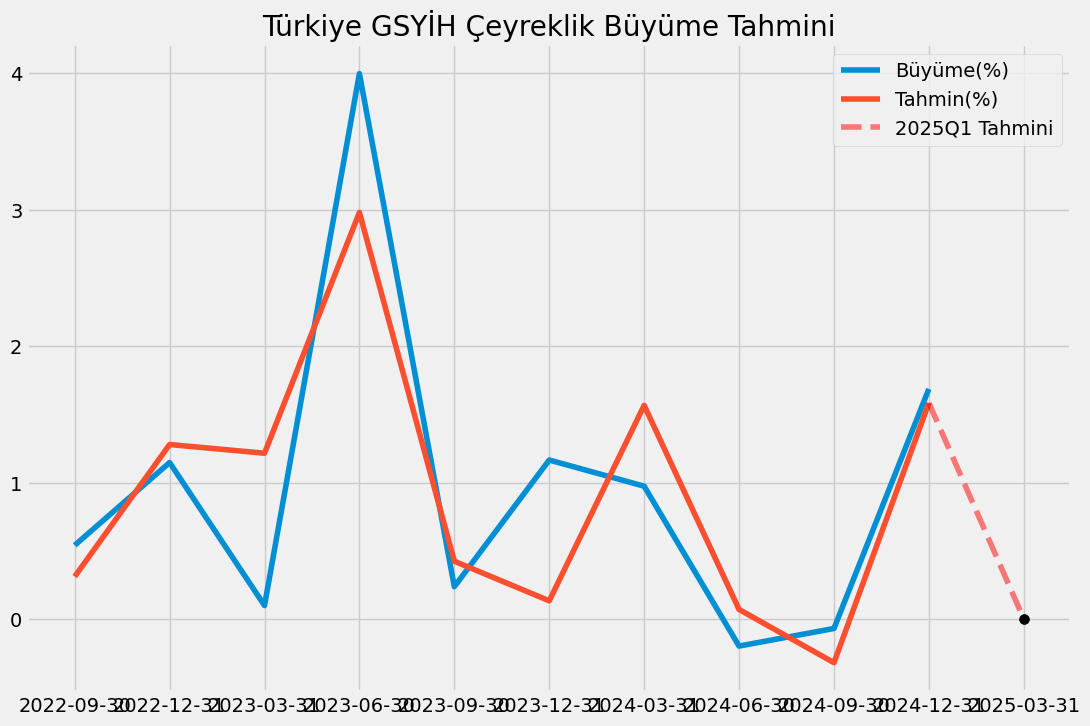

In [57]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2025Q1 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [64]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=71,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2523544840003112)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.04866959242297068)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=30,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+10}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 75ms/step
0.96705496
1/1 [==============================] - 0s 65ms/step
0.7814394
1/1 [==============================] - 0s 65ms/step
0.39798328
1/1 [==============================] - 0s 69ms/step
0.34904215
1/1 [==============================] - 0s 66ms/step
0.43688825
1/1 [==============================] - 0s 67ms/step
0.72822785
1/1 [==============================] - 0s 67ms/step
0.6925101
1/1 [==============================] - 0s 65ms/step
0.219379
1/1 [==============================] - 0s 70ms/step
-0.16387816
1/1 [==============================] - 0s 69ms/step
0.225596


In [70]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=71,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2523544840003112)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.04866959242297068)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=30,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))


pred

1/1 [==============================] - 0s 95ms/step


,Büyüme
2022-09-30,0.857908
2022-12-31,1.562087
2023-03-31,0.775617
2023-06-30,3.045136
2023-09-30,0.199404
2023-12-31,0.332942
2024-03-31,1.429317
2024-06-30,-0.041772
2024-09-30,-0.341837
2024-12-31,1.447796


In [73]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-11:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2.index=tahminler2.index.strftime("%Y-%m-%d")
tahminler2=tahminler2.round(1)
tahminler2

,Büyüme,Tahmin
2022-09-30,0.5,0.9
2022-12-31,1.1,1.6
2023-03-31,0.1,0.8
2023-06-30,4.0,3.0
2023-09-30,0.2,0.2
2023-12-31,1.2,0.3
2024-03-31,1.0,1.4
2024-06-30,-0.2,-0.0
2024-09-30,-0.1,-0.3
2024-12-31,1.7,1.4


In [72]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.26938410948479197

In [77]:
selected_features =["KKO","Kart","Sanayi","Tüketici Güven","Normal Sipariş","Reel Güven","Elektrik"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-11,:],X.iloc[-11:,:]
y_train,y_test=y[:-11],y[-11:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(10):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=14,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8647337880542664)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0476600450555587)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=119,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))
    modeller[f"NN_{i+20}"]=pred["Büyüme"]
    print(pred.iloc[-1,0])

1/1 [==============================] - 0s 103ms/step
1.0105287
1/1 [==============================] - 0s 93ms/step
1.7841145
1/1 [==============================] - 0s 68ms/step
1.4089531
1/1 [==============================] - 0s 69ms/step
1.1584355
1/1 [==============================] - 0s 76ms/step
1.0163411
1/1 [==============================] - 0s 82ms/step
1.2042698
1/1 [==============================] - 0s 88ms/step
0.6326518
1/1 [==============================] - 0s 85ms/step
1.1405739
1/1 [==============================] - 0s 105ms/step
1.295461
1/1 [==============================] - 0s 77ms/step
1.2536312


In [78]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=14,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.8647337880542664)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0476600450555587)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=119,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 [==============================] - 0s 43ms/step


,Büyüme
2022-09-30,-0.224916
2022-12-31,1.674152
2023-03-31,1.414620
2023-06-30,3.230434
2023-09-30,0.419870
2023-12-31,0.947431
2024-03-31,1.826964
2024-06-30,0.490736
2024-09-30,-0.141271
2024-12-31,1.969673


In [79]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3.index=tahminler3.index.strftime("%Y-%m-%d")
tahminler3

,Büyüme,Tahmin
2022-12-31,1.148543,1.674152
2023-03-31,0.101158,1.414620
2023-06-30,3.998077,3.230434
2023-09-30,0.239144,0.419870
2023-12-31,1.166981,0.947431
2024-03-31,0.975410,1.826964
2024-06-30,-0.195958,0.490736
2024-09-30,-0.067054,-0.141271
2024-12-31,1.687901,1.969673
2025-03-31,1.687901,0.899248


In [80]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.3040000000000002

In [81]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

,Tahmin,Hata,Ağırlık
0,1.007979,1.743044,0.573709
1,-0.158085,1.146309,0.872365
2,-0.462806,2.549634,0.392213
3,-0.122087,1.623168,0.616079
4,-0.924543,2.445544,0.408907
5,2.010658,2.024157,0.494033
6,0.077064,1.288395,0.776159
7,0.403883,0.769656,1.299282
8,-0.249170,1.523375,0.656437
9,0.184631,1.043086,0.958694


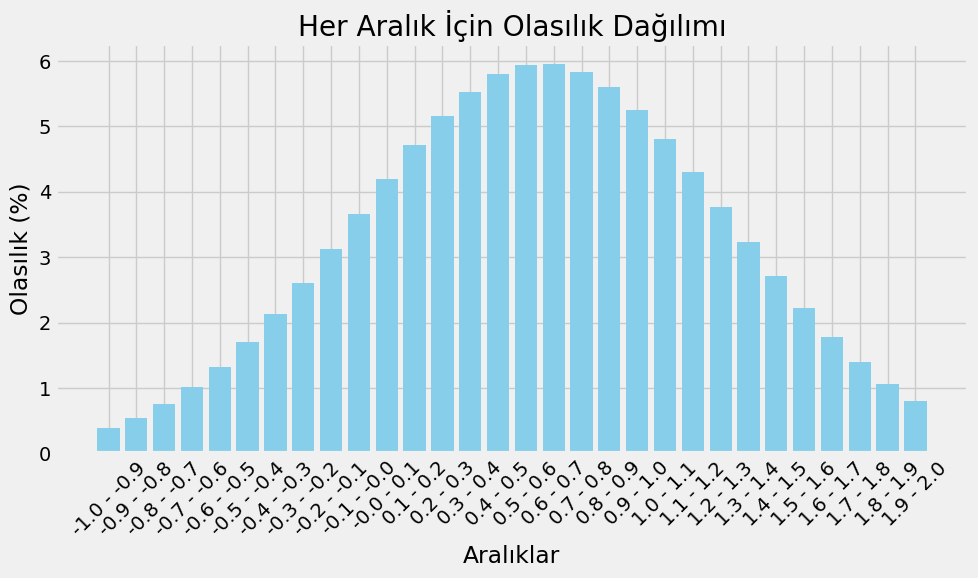

In [82]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = -1
bitis =  2.1

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()

In [84]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.995]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%99 olasılıkla tahminler -1.11 ile 2.33 arasındadır.


In [85]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,0.313098,0.9,NaN,0.606549,0.542207
2022-12-31,1.280628,1.6,1.674152,1.518260,1.148543
2023-03-31,1.216857,0.8,1.414620,1.143826,0.101158
2023-06-30,2.980879,3.0,3.230434,3.070438,3.998077
2023-09-30,0.425571,0.2,0.419870,0.348480,0.239144
2023-12-31,0.135648,0.3,0.947431,0.461026,1.166981
2024-03-31,1.567466,1.4,1.826964,1.598143,0.975410
2024-06-30,0.072475,-0.0,0.490736,0.187737,-0.195958
2024-09-30,-0.317638,-0.3,-0.141271,-0.252970,-0.067054
2024-12-31,1.585194,1.4,1.969673,1.651622,1.687901


In [91]:
import pandas as pd
from datetime import datetime


csv_file = "cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-04-11 tarihli tahmin başarıyla eklendi.


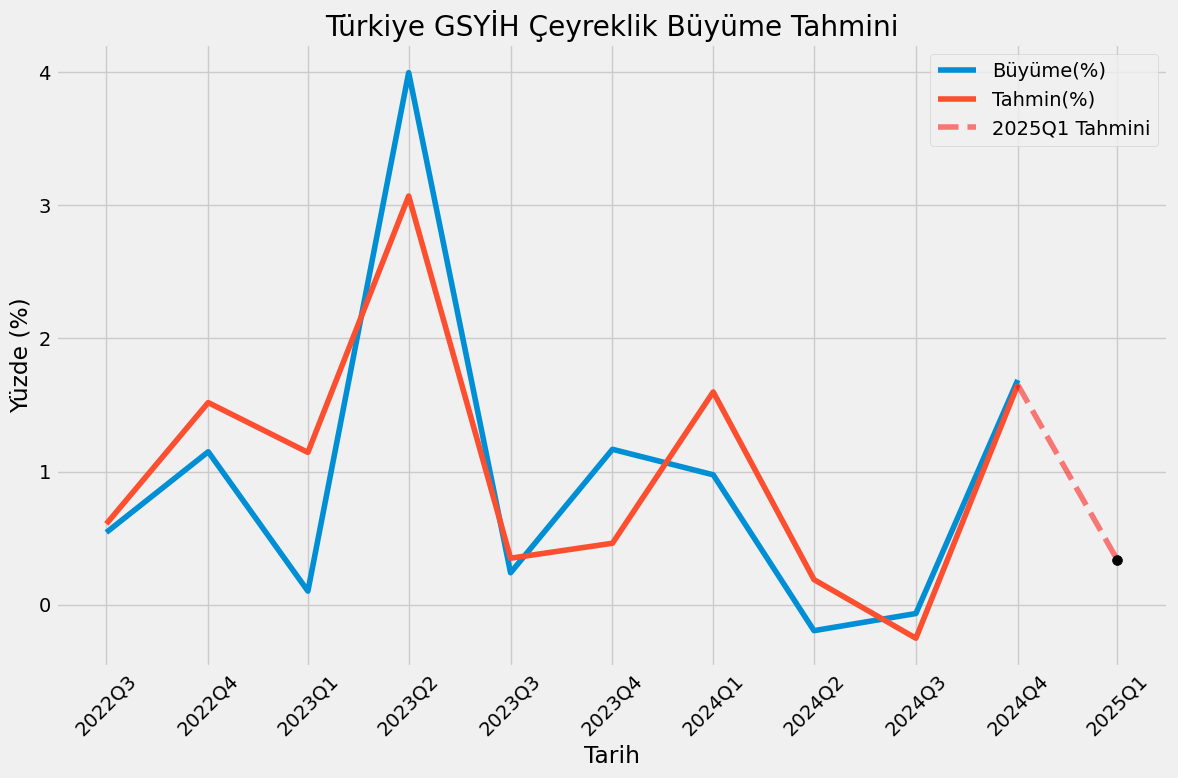

In [87]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [88]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [89]:


veri.loc[pd.to_datetime("2025-03-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [92]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-09-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

In [93]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [94]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [95]:
veri.to_csv("yıllık.csv")

In [96]:
import pandas as pd
from datetime import datetime


csv_file = "cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-04-11 tarihli tahmin başarıyla eklendi.


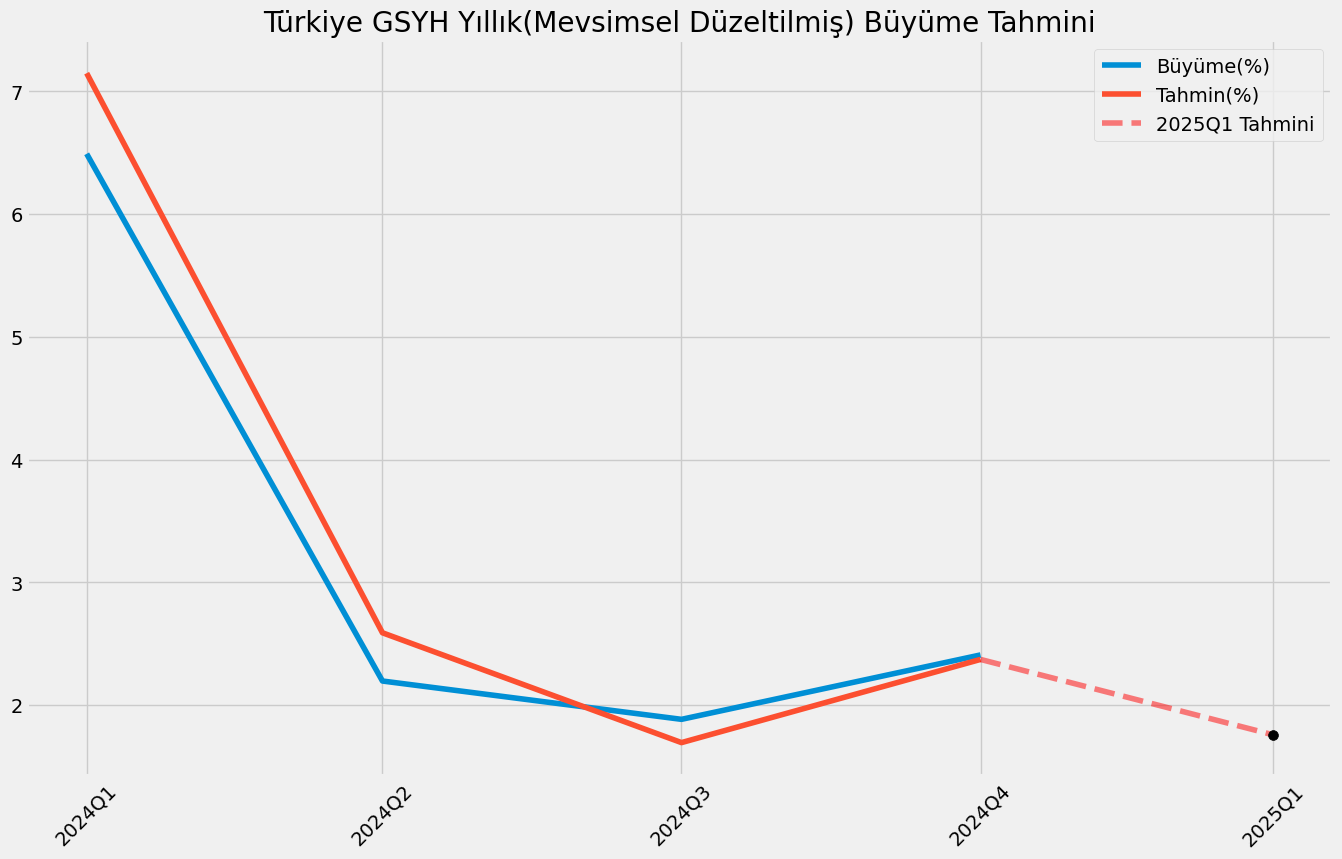

In [97]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





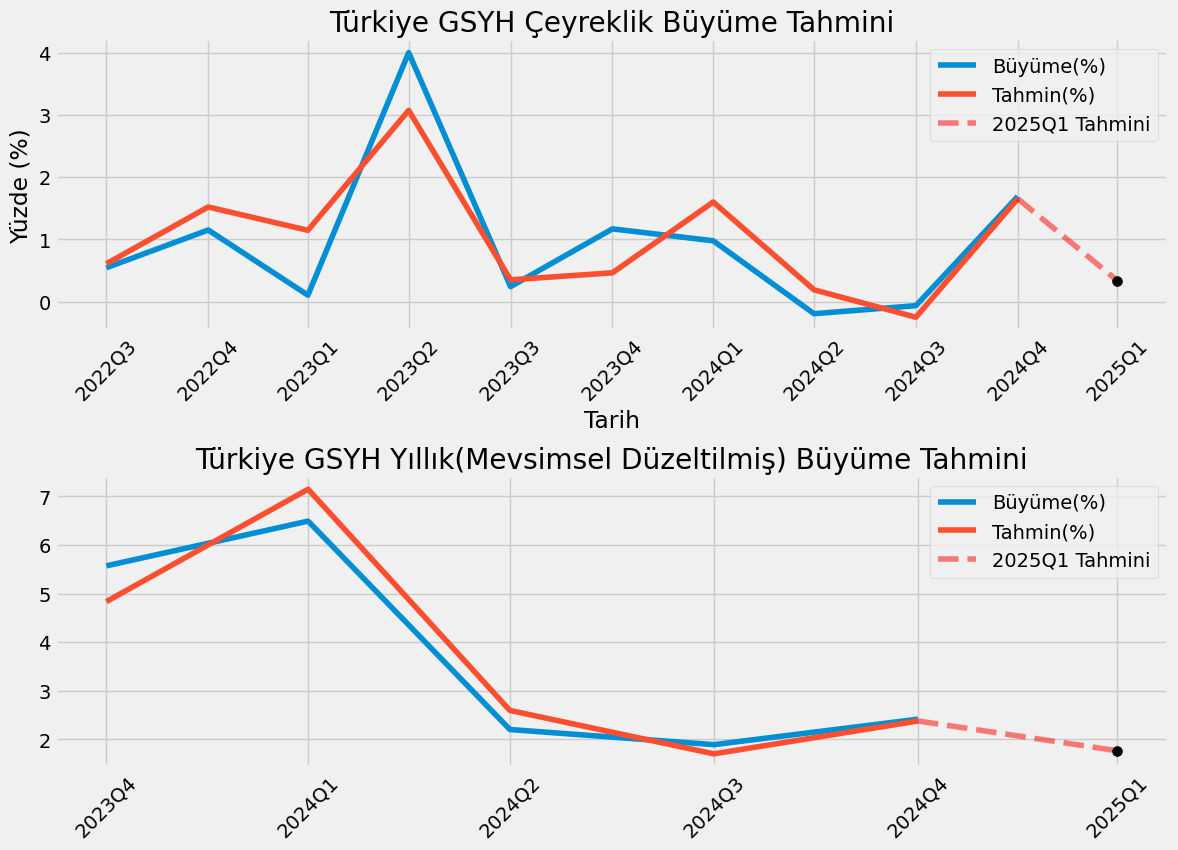

In [98]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2025Q1 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [108]:
veri

,Büyüme,Tahmin,Üst,Alt
2022-09-30,NaN,-6.510613,-100.000000,-100.000000
2022-12-31,NaN,-5.600099,-100.000000,-100.000000
2023-03-31,NaN,-6.447134,-100.000000,-100.000000
2023-06-30,NaN,-4.886473,-100.000000,-100.000000
2023-09-30,5.550766,5.665897,-100.000000,-100.000000
2023-12-31,5.570007,4.833327,-100.000000,-100.000000
2024-03-31,6.492022,7.148778,-100.000000,-100.000000
2024-06-30,2.197411,2.590307,-100.000000,-100.000000
2024-09-30,1.885232,1.695684,-100.000000,-100.000000
2024-12-31,2.409849,2.373313,-100.000000,-100.000000


In [99]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.


In [100]:
günlük=pd.read_csv("cari.csv",index_col=0).drop_duplicates(keep="last")
yıllık=pd.read_csv("cariyıl.csv",index_col=0).drop_duplicates(keep="last")
yıllık

,Tahmin,Üst,Alt
2024-12-09,1.466983,1.639763,1.329052
2024-12-11,1.436758,1.602258,1.304639
2024-12-12,1.446833,1.614760,1.312777
2024-12-13,1.477058,1.652264,1.337190
2024-12-16,1.456908,1.627261,1.320914
2024-12-18,1.486125,1.663516,1.344514
2024-12-19,1.426683,1.589756,1.296501
2024-12-20,1.507283,1.689769,1.361603
2024-12-23,1.487133,1.664766,1.345328
2024-12-24,1.536500,1.726024,1.385202


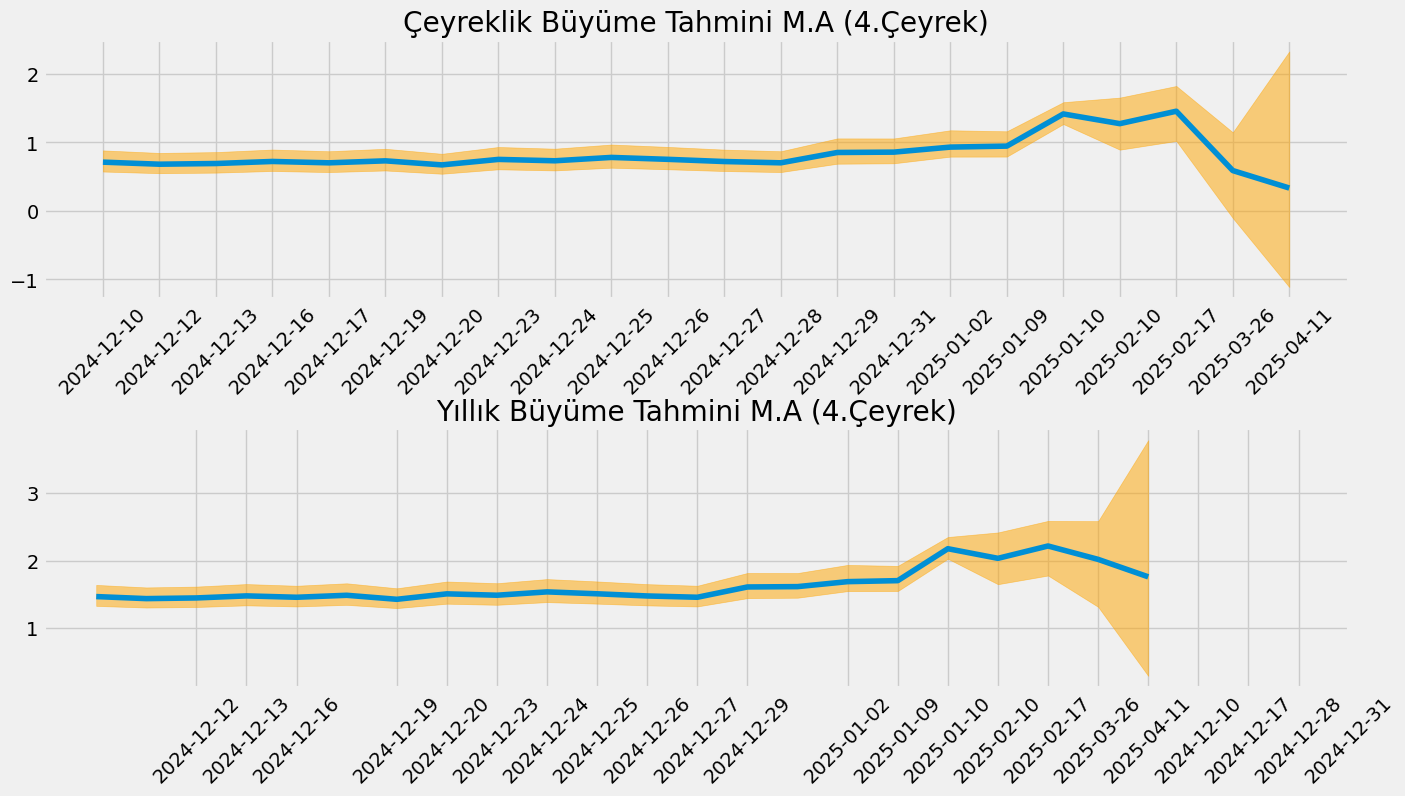

In [101]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(yıllık["Tahmin"],label="Ortalama")
plt.fill_between(yıllık.index,yıllık["Üst"],yıllık["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplots_adjust(hspace=0.5)


In [102]:



ham=pd.read_excel("veri3.xlsx",index_col=0)
arındırılmış=pd.read_excel("veri2.xlsx",index_col=0)
arındırılmış.index=pd.to_datetime(arındırılmış.index)
ham.index=pd.to_datetime(ham.index)


arındırılmış.loc["2025-03-31"]=((günlük["Tahmin"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"]
arındırılmış.index=pd.to_datetime(arındırılmış.index)

ham_yıllık=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık=ham_yıllık.values[0]
ham_yıllık=np.round(ham_yıllık,2)


arındırılmış.loc["2025-03-31"]=((günlük["Üst"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_üst=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_üst=ham_yıllık_üst.values[0]
ham_yıllık_üst=np.round(ham_yıllık_üst,2)


arındırılmış.loc["2025-03-31"]=((günlük["Alt"].iloc[-1]/100)+1)*arındırılmış.loc["2024-12-31"].values[0]

ham_yıllık_alt=(((arındırılmış.loc["2025-03-31"].values[0]*0.901)/ham.loc["2024-03-31"])-1)*100
ham_yıllık_alt=ham_yıllık_alt.values[0]
ham_yıllık_alt=np.round(ham_yıllık_alt,2)

In [104]:
import pandas as pd
from datetime import datetime


csv_file = "ham.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = ham_yıllık
ust_limit=ham_yıllık_üst
alt_limit=ham_yıllık_alt
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-04-11 tarihli tahmin başarıyla eklendi.


In [105]:
df

,Tahmin,Üst,Alt
2024-12-10,2.01,2.18,1.87
2024-12-11,2.03,2.21,1.88
2024-12-12,1.98,2.14,1.84
2024-12-13,1.99,2.16,1.85
2024-12-16,2.02,2.19,1.88
2024-12-17,2.00,2.17,1.86
2024-12-18,2.03,2.21,1.88
2024-12-19,2.03,2.20,1.88
2024-12-20,1.97,2.13,1.84
2024-12-23,2.05,2.23,1.90


In [159]:
df

,Tahmin,Üst,Alt
2024-12-10,2.01,2.18,1.87
2024-12-11,2.03,2.21,1.88
2024-12-12,1.98,2.14,1.84
2024-12-13,1.99,2.16,1.85
2024-12-16,2.02,2.19,1.88
2024-12-17,2.00,2.17,1.86
2024-12-18,2.03,2.21,1.88
2024-12-19,2.03,2.20,1.88
2024-12-20,1.97,2.13,1.84
2024-12-23,2.05,2.23,1.90


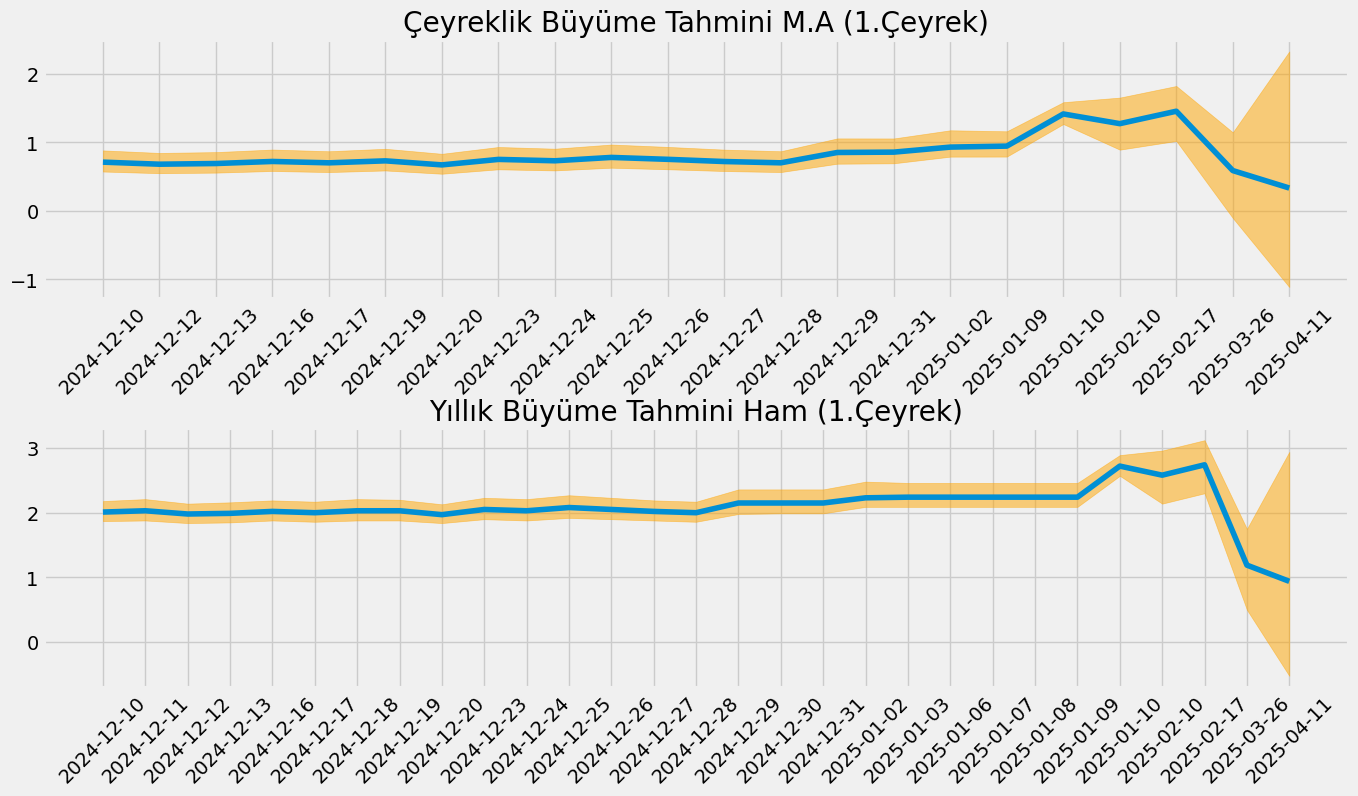

In [107]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (1.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini Ham (1.Çeyrek)")
plt.plot(df["Tahmin"],label="Ortalama")
plt.fill_between(df.index,df["Üst"],df["Alt"],alpha=0.5,color="orange")
plt.xticks(df.index,rotation=45)

plt.subplots_adjust(hspace=0.5)
